<a href="https://colab.research.google.com/github/edinsonvo/econometria/blob/main/Econometria_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# **Marco Teórico: Análisis de la Permanencia Migratoria en Colombia**

#### **1. Planteamiento del Problema**

El fenómeno migratorio en Colombia ha experimentado una transformación significativa en los últimos años, con la llegada de un considerable número de migrantes, principalmente de Venezuela. Comprender los factores que inciden en la decisión y la capacidad de permanencia de los migrantes en el país es crucial para el diseño e implementación de políticas públicas efectivas, la asignación eficiente de recursos y la promoción de una integración socioeconómica exitosa. La permanencia no solo se refiere a la continuidad de la residencia, sino que también engloba la adaptación y el establecimiento de raíces en la sociedad de acogida. La dificultad para medir y predecir esta permanencia con precisión representa un reto para las autoridades y organizaciones que trabajan en pro de esta población. La pregunta central que este estudio busca abordar es: **¿Cuáles son los principales factores socio-demográficos y económicos que influyen en la duración de la permanencia de los migrantes en Colombia, y cómo pueden ser modelados para predecir este comportamiento?**

#### **2. Enfoque Metodológico y Modelización Predictiva**

Para abordar este problema, se recurre a un enfoque cuantitativo, aplicando modelos predictivos y de análisis de datos que tienen raíces tanto en la econometría como en el aprendizaje automático. La econometría, con su énfasis en la inferencia causal y la interpretación de relaciones entre variables, proporciona un marco robusto para entender los "porqués" detrás de la permanencia. Los modelos de aprendizaje automático, por su parte, priorizan la capacidad predictiva y la identificación de patrones complejos, incluso si la interpretabilidad directa es menor.

En este estudio, se exploran tres tipos de modelos para capturar diferentes facetas del problema:

* **Modelos Lineales (Mínimos Cuadrados Ordinarios - MCO)**: Se utiliza como un punto de referencia fundamental en la econometría, permitiendo estimar la relación lineal entre las variables explicativas y la duración de la permanencia. Su alta interpretabilidad de los coeficientes facilita la comprensión directa del impacto de cada factor.
* **Modelos Probabilísticos (Regresión Logística - Logit)**: Dada la naturaleza de los fenómenos de decisión y clasificación en el ámbito social, este modelo permite estimar la probabilidad de que un migrante se encuentre en una categoría específica de permanencia (ej., "permanencia larga" vs. "permanencia corta"). Esto es invaluable para la segmentación de la población y el diseño de intervenciones focalizadas.
* **Modelos de Aprendizaje Automático (Random Forest Regressor)**: Reconociendo la posible complejidad y no linealidad en los datos socioeconómicos, este modelo de conjunto ofrece una mayor capacidad predictiva al combinar múltiples árboles de decisión. Aunque su interpretabilidad directa puede ser menor, su robustez y habilidad para capturar relaciones intrincadas lo hacen un candidato potente para la predicción de la duración de la permanencia.

La comparación entre estos modelos no solo busca identificar el de mejor rendimiento predictivo, sino también sopesar las ventajas y desventajas de cada uno en términos de interpretabilidad y aplicabilidad a la formulación de políticas.

#### **3. La Encuesta de Permanencia Migratoria 7 (EPM7_Personas)**

La **Encuesta de Permanencia Migratoria 7 (EPM7)** es una fuente de datos crucial para este análisis, proporcionando información detallada sobre la población migrante en Colombia. Este dataset, específicamente la tabla `EPM7_Personas`, contiene registros individuales de migrantes y abarca una amplia gama de variables que son fundamentales para entender su proceso de establecimiento y permanencia.

Entre las variables clave disponibles en la EPM7_Personas, se encuentran:
* **Características Socio-demográficas**: Edad, sexo, composición del hogar, contactos pre-migración y redes de apoyo.
* **Situación Migratoria**: Estatus legal (regularizado, en proceso, irregular), lo cual es un factor determinante en el acceso a derechos y oportunidades.
* **Condiciones Socioeconómicas**: Afiliación a salud y pensión, situación laboral (ocupación, tipo de contrato, horas trabajadas), dificultades para encontrar empleo y actividad económica principal.

La variable objetivo de nuestro estudio, `permanencia_anos`, se deriva del tiempo que el migrante lleva en el país hasta la fecha de la encuesta. La riqueza de la información contenida en la EPM7_Personas permite construir un perfil multifacético de los migrantes y explorar cómo estas características se relacionan con el tiempo que eligen (o logran) permanecer en Colombia. Los datos procesados incluyen la recodificación y creación de nuevas variables a partir de las originales, asegurando que estén en un formato adecuado para el modelado predictivo.

----

## Paso 1: Carga de Datos y Construcción de la Variable Dependiente permanencia_anos

En este primer paso, cargaremos el conjunto de datos EPM7_Personas.csv y construiremos nuestra variable dependiente clave: permanencia_anos. Esta variable representará el tiempo que una persona migrante ha permanecido en Colombia hasta la fecha de la encuesta.

In [153]:
import pandas as pd
import numpy as np

# --- 1. Carga de Datos ---
# Se carga el archivo CSV 'EPM7_Personas.csv' en un DataFrame de pandas.
# Se especifica 'encoding' como 'latin1' debido a que los archivos del DANE
# a menudo utilizan esta codificación.
# El delimitador se establece en ';' según lo indicado en los metadatos del archivo.
try:
    df_personas = pd.read_csv('EPM7_Personas.csv', encoding='latin1', delimiter=';')
    print("DataFrame 'df_personas' cargado exitosamente.")
    print(f"Dimensiones iniciales del DataFrame: {df_personas.shape}")
    print("\nPrimeras 5 filas del DataFrame:")
    print(df_personas.head())
except FileNotFoundError:
    print("Error: El archivo 'EPM7_Personas.csv' no se encontró.")
    print("Asegúrate de que el archivo esté en el mismo directorio que tu script o proporciona la ruta completa.")
    exit() # Termina la ejecución si el archivo no existe

# --- 2. Construcción de la Variable Dependiente: 'permanencia_anos' ---
# La variable sm1 indica el año en que la persona ingresó a Colombia por primera vez.
# Nuestro objetivo es calcular el tiempo de permanencia hasta el año de la encuesta.

# Definimos el año de realización de la encuesta.
# Según la información disponible, la EPM7 (Ronda 7) es del año 2024.
ANO_ENCUESTA = 2024
print(f"\nEl año de referencia para la encuesta se establece en: {ANO_ENCUESTA}")

# Verificar si la columna 'sm1' existe en el DataFrame antes de intentar usarla.
if 'sm1' not in df_personas.columns:
    print("\nError Crítico: La columna 'sm1' no se encontró en el DataFrame.")
    print("Por favor, verifica el nombre exacto de la variable en tu diccionario de datos del DANE para EPM7.")
    exit() # Se detiene el script si la variable esencial no está presente

# Convertir la columna 'sm1' a tipo numérico.
# 'errors="coerce"' convertirá cualquier valor no numérico (como cadenas vacías o texto) a NaN (Not a Number).
df_personas['sm1'] = pd.to_numeric(df_personas['sm1'], errors='coerce')

# Calcular los años de permanencia: Año de la encuesta - Año de primera entrada.
df_personas['permanencia_anos'] = ANO_ENCUESTA - df_personas['sm1']

# --- 3. Limpieza Inicial de la Variable Dependiente ---
# Es fundamental limpiar la variable dependiente de valores inválidos o ilógicos.

# 3.1 Eliminar filas donde 'permanencia_anos' es NaN.
# Esto sucede si 'sm1' era NaN o no pudo ser convertido a número.
filas_con_nan_permanencia = df_personas['permanencia_anos'].isnull().sum()
if filas_con_nan_permanencia > 0:
    df_personas.dropna(subset=['permanencia_anos'], inplace=True)
    print(f"\nSe eliminaron {filas_con_nan_permanencia} filas con valores NaN en 'permanencia_anos'.")

# 3.2 Filtrar valores ilógicos: la permanencia no puede ser negativa.
# Una permanencia negativa indicaría un error en sm1 (año de entrada posterior al año de encuesta).
filas_permanencia_negativa = df_personas[df_personas['permanencia_anos'] < 0].shape[0]
if filas_permanencia_negativa > 0:
    df_personas = df_personas[df_personas['permanencia_anos'] >= 0].copy()
    print(f"Se eliminaron {filas_permanencia_negativa} filas con 'permanencia_anos' negativos.")

print(f"\nDimensiones del DataFrame después de la limpieza de 'permanencia_anos': {df_personas.shape}")

# --- 4. Verificación de la Variable Creada ---
print("\nEstadísticas descriptivas de la variable dependiente 'permanencia_anos':")
print(df_personas['permanencia_anos'].describe())

print("\nConteo de valores de 'permanencia_anos' (primeros 10):")
print(df_personas['permanencia_anos'].value_counts().head(10))

print("\n¡Paso 1 Completado! La variable 'permanencia_anos' ha sido creada y limpiada.")

DataFrame 'df_personas' cargado exitosamente.
Dimensiones iniciales del DataFrame: (8022, 103)

Primeras 5 filas del DataFrame:
   directorio  secuencia_p  orden        fex_per  Ide10  Ide14  Ide14__1  \
0     7495874            1      1  4.752.932.879     23      5       0.0   
1     7397715            1      1  1.099.276.974     30      2       0.0   
2     7382223            1      2  8.210.581.404     40      2       0.0   
3     7397643            1      1  9.259.436.764     33      3       0.0   
4     7397661            1      6  9.259.436.764     35      5       0.0   

   Ide14__2  Ide14__3  Ide14__4  ...  sm16__5  sm16__6  sm17  sm2   sm3  sm4  \
0       0.0       0.0       0.0  ...      0.0      0.0     2   12  2024    2   
1       1.0       0.0       0.0  ...      NaN      NaN     2    4  2018    4   
2       1.0       0.0       0.0  ...      NaN      NaN     2   11  2016   11   
3       0.0       1.0       0.0  ...      0.0      0.0     2    3  2023   12   
4       0.0    

### Explicación y Justificación:

1.  **Carga de Datos:** Se utiliza `pd.read_csv` para cargar el archivo. Es crucial especificar el `delimiter=';'` y el `encoding='latin1'` para asegurar que el archivo se lea correctamente, ya que los archivos del DANE a menudo tienen estas características.
2.  **Definición del Año de Encuesta (`ANO_ENCUESTA`):** Para calcular el tiempo de permanencia, necesitamos un punto de referencia temporal. Hemos establecido `2024` como el año de la encuesta, basándonos en la identificación de la base de datos como EPM7 (Ronda 7), que es la más reciente disponible públicamente y corresponde a ese año. Si en el futuro tienes acceso a una variable de fecha exacta de la encuesta dentro del dataset, sería aún más preciso usarla para calcular la diferencia de tiempo.
3.  **Construcción de `permanencia_anos`:** La lógica es sencilla: `Año de la Encuesta - Año de Ingreso (SM1)`. Esto nos da directamente los años completos que la persona ha permanecido en el país.
4.  **Limpieza de Datos:**
      * **`pd.to_numeric(errors='coerce')`**: Esto es vital. La variable `SM1` podría contener valores no numéricos (ej. celdas vacías, errores de transcripción). `coerce` los convierte a `NaN`, lo que nos permite manejarlos explícitamente.
      * **`dropna(subset=['permanencia_anos'])`**: Elimina las filas donde el cálculo de `permanencia_anos` resultó en `NaN` (por ejemplo, si `SM1` era `NaN`).
      * **Filtrado de `permanencia_anos < 0`**: Es lógicamente imposible tener un tiempo de permanencia negativo. Esto podría ocurrir si el `SM1` (año de entrada) fuera incorrectamente reportado como posterior al `ANO_ENCUESTA`. Filtrar estos valores asegura la coherencia de nuestra variable dependiente.
5.  **Verificación:** Las estadísticas descriptivas (`.describe()`) y el conteo de valores (`.value_counts()`) nos dan una visión rápida de la distribución de nuestra nueva variable dependiente, permitiéndonos identificar posibles problemas o características inesperadas antes de continuar.

Con este paso, tenemos nuestra variable dependiente `permanencia_anos` lista para ser utilizada en el estudio econométrico. El siguiente paso sería seleccionar y preprocesar las variables independientes.



---



## Paso 2: Creación de la Variable Independiente situacion_migratoria_definida
En este paso, construiremos una nueva variable binaria, situacion_migratoria_definida, a partir de la variable original IDE14. Esta variable nos permitirá simplificar el análisis del estatus migratorio, agrupando todos los documentos en una categoría de "definida" y el estatus "Ninguno" (irregular) como "no definida".

Podemos definir "situación migratoria definida" como la posesión de cualquiera de los documentos (1, 2, 3, 4, 6) y "no definida" como "Ninguno" (5).

* IDE14__1: Salvoconducto
* IDE14__2: PPT
* IDE14__3: PRP
* IDE14__4: PRPFF (Permiso de Residencia Permanente)
* IDE14__5: Ninguno (Estatus irregular)
* IDE14__6: Otro


In [154]:
# --- 2. Preparación para Consolidar IDE14 ---
# Columnas que representan el estatus migratorio.
status_cols = ['Ide14__1', 'Ide14__2', 'Ide14__3', 'Ide14__4', 'Ide14__5', 'Ide14__6']

# Verificar la existencia de todas las columnas necesarias.
missing_cols = [col for col in status_cols if col not in df_personas.columns]
if missing_cols:
    print(f"\nError: Las siguientes columnas de estatus migratorio necesarias no se encontraron: {missing_cols}")
    print("Por favor, verifica los nombres exactos de las variables en tu archivo CSV (distingue mayúsculas/minúsculas).")
    exit()
else:
    print(f"\nSe encontraron todas las columnas de estatus migratorio: {status_cols}")

# --- 3. Asegurar que las columnas sean numéricas y manejar NAs ---
for col in status_cols:
    df_personas[col] = pd.to_numeric(df_personas[col], errors='coerce').fillna(0)
    df_personas[col] = df_personas[col].astype(int)
print("Columnas binarias de estatus migratorio convertidas a numérico y NAs manejados.")

# --- 4. Consolidar las columnas Ide14__X en una única columna 'estatus_migratorio_consolidado' ---
# Crearemos una nueva columna inicializada con NaN (o un valor que indique 'ninguno/desconocido').
df_personas['estatus_migratorio_consolidado'] = np.nan

# Asignar el valor numérico (1 a 6) basado en cuál columna tiene un '1'.
for i, col in enumerate(status_cols):
    # Solo asigna si la columna actual es 1 y la nueva columna aún no ha sido asignada
    # (esto asume mutuamente excluyentes, el primero que encuentra se asigna).
    # Opcional: Para una asignación más robusta si no son estrictamente mutuamente excluyentes,
    # podríamos elegir una jerarquía o la primera que aparezca.
    # Aquí, simplemente asignamos el valor de la categoría si la columna es 1.
    df_personas.loc[df_personas[col] == 1, 'estatus_migratorio_consolidado'] = i + 1

# Manejar casos donde ninguna de las Ide14__X es 1 (si existieran, aunque poco probable en datos limpios)
# Por ejemplo, podríamos asignarle un valor específico como 99 para "Desconocido".
# Por ahora, si un NaN persiste, significa que la fila no tenía un 1 en ninguna de las Ide14__X.
# En la práctica, esto no debería ocurrir si IDE14__5 cubre 'Ninguno'.
nas_consolidado = df_personas['estatus_migratorio_consolidado'].isnull().sum()
if nas_consolidado > 0:
    print(f"Advertencia: Se encontraron {nas_consolidado} filas donde ninguna columna Ide14__X era 1.")
    # Podrías decidir cómo manejar estos NAs, ej. df_personas['estatus_migratorio_consolidado'].fillna(5, inplace=True)
    # Si sabes que un NA aquí significa 'Ninguno' (categoría 5).

print("\nColumna 'estatus_migratorio_consolidado' creada exitosamente.")
print("  1: Salvoconducto, 2: PPT, 3: PRP, 4: PRPFF, 5: Ninguno, 6: Otro")

# --- 5. Re-crear la variable 'situacion_migratoria_definida' a partir de la consolidada ---
# Las categorías definidas son 1, 2, 3, 4, 6. La categoría 5 es "Ninguno" (no definida).
categorias_definidas_consolidadas = [1, 2, 3, 4, 6]
df_personas['situacion_migratoria_definida'] = np.where(
    df_personas['estatus_migratorio_consolidado'].isin(categorias_definidas_consolidadas),
    1,  # Situación migratoria definida
    0   # Situación migratoria no definida
)
print("Variable 'situacion_migratoria_definida' actualizada usando la columna consolidada.")


# --- 6. Verificación de las nuevas variables ---
print("\nConteo de valores para 'estatus_migratorio_consolidado':")
print(df_personas['estatus_migratorio_consolidado'].value_counts().sort_index())

print("\nConteo de valores para 'situacion_migratoria_definida' (actualizado):")
print(df_personas['situacion_migratoria_definida'].value_counts())

print("\nPrimeras filas del DataFrame con las nuevas variables:")
print(df_personas[status_cols + ['estatus_migratorio_consolidado', 'situacion_migratoria_definida', 'permanencia_anos']].head())

print("\n¡Paso 3 Completado! Ahora tenemos una columna consolidada para el estatus migratorio.")


Se encontraron todas las columnas de estatus migratorio: ['Ide14__1', 'Ide14__2', 'Ide14__3', 'Ide14__4', 'Ide14__5', 'Ide14__6']
Columnas binarias de estatus migratorio convertidas a numérico y NAs manejados.
Advertencia: Se encontraron 1442 filas donde ninguna columna Ide14__X era 1.

Columna 'estatus_migratorio_consolidado' creada exitosamente.
  1: Salvoconducto, 2: PPT, 3: PRP, 4: PRPFF, 5: Ninguno, 6: Otro
Variable 'situacion_migratoria_definida' actualizada usando la columna consolidada.

Conteo de valores para 'estatus_migratorio_consolidado':
estatus_migratorio_consolidado
1.0      51
2.0    4404
3.0     354
4.0       4
5.0    1736
6.0      31
Name: count, dtype: int64

Conteo de valores para 'situacion_migratoria_definida' (actualizado):
situacion_migratoria_definida
1    4844
0    3178
Name: count, dtype: int64

Primeras filas del DataFrame con las nuevas variables:
   Ide14__1  Ide14__2  Ide14__3  Ide14__4  Ide14__5  Ide14__6  \
0         0         0         0         0   

### Explicación y Justificación del Código:

1. Consolidación (estatus_migratorio_consolidado):

* Iteramos a través de las columnas Ide14__1 a Ide14__6.

* Para cada fila, si Ide14__X es 1, asignamos el valor X a la nueva columna estatus_migratorio_consolidado.

* np.nan se usa como valor inicial para la columna, lo que nos permitiría identificar filas que no tenían un 1 en ninguna de las columnas Ide14__X (aunque en un dataset limpio esto es raro).

* Importante: Esta lógica asume mutua exclusividad. Si una persona pudiera tener 1 en Ide14__2 y también en Ide14__3 (lo cual es atípico para una pregunta de "estatus"), entonces necesitaríamos una regla de desempate (ej. priorizar un estatus sobre otro). Para datos de encuesta, lo usual es que sea excluyente.

2. Actualización de situacion_migratoria_definida:

* Una vez que tenemos estatus_migratorio_consolidado, es mucho más fácil y coherente derivar situacion_migratoria_definida a partir de ella.

* Definimos categorias_definidas_consolidadas (1, 2, 3, 4, 6) y usamos isin() para verificar si el valor de estatus_migratorio_consolidado de una fila está en esa lista.

Ahora, tu DataFrame *df_personas* tiene una columna **estatus_migratorio_consolidado** que contiene los valores de 1 a 6, haciendo mucho más sencillo referenciar los tipos de estatus migratorio. Esta es una base más flexible para futuros análisis, ya sea que quieras usar esta variable directamente como categórica en un modelo o derivar otras variables binarias de ella.

---
## Paso 3 - Variable edad (Ide10)

1.   Asegurarnos de que la columna Ide10 esté presente.

2. Convertir sus valores a un tipo numérico adecuado.

3. Manejar cualquier valor faltante (NaN).

4. Identificar y limpiar valores atípicos o ilógicos (como edades de 0 o 200 años).

5. Finalmente, condensar esa edad en rangos significativos (rango_edad).




In [155]:
# --- PASO 3: Preprocesamiento de la variable 'Ide10' (Edad) y creación de 'rango_edad' ---

# --- ESTA ES LA SECCIÓN ESPECÍFICA PARA LA PREPARACIÓN DE LA VARIABLE DE EDAD (IDE10) ---

# 3.1 Verificar si la columna 'Ide10' existe
if 'Ide10' not in df_personas.columns:
    print("\nError: La columna 'Ide10' (Edad) no se encontró en el DataFrame.")
    print("Por favor, verifica el nombre exacto de la variable de edad en tu diccionario de datos.")
    exit()

print(f"\n--- Iniciando preprocesamiento de 'Ide10' (Edad) ---")

# 3.2 Convertir 'Ide10' a tipo numérico y manejar valores faltantes
# Cualquier valor no numérico en 'Ide10' se convertirá a NaN.
df_personas['Ide10'] = pd.to_numeric(df_personas['Ide10'], errors='coerce')

# Se eliminan las filas que tienen NaN en 'Ide10' para asegurar la calidad de la variable.
nas_edad_antes = df_personas['Ide10'].isnull().sum()
if nas_edad_antes > 0:
    print(f"Se encontraron {nas_edad_antes} valores NaN en 'Ide10' (Edad). Se eliminarán estas filas.")
    df_personas.dropna(subset=['Ide10'], inplace=True)
    print(f"Nuevo tamaño del DataFrame después de eliminar NAs en 'Ide10': {df_personas.shape}")

# 3.3 Verificar estadísticas descriptivas de la edad limpia
print("\nEstadísticas descriptivas de 'Ide10' (Edad) después de manejar NAs:")
print(df_personas['Ide10'].describe())

# 3.4 Identificar y manejar valores atípicos/ilógicos en la edad
# Se definen rangos lógicos para la edad (ej. entre 1 y 99 años).
min_edad_aceptable = 1
max_edad_aceptable = 99

filas_edad_iloga = df_personas[(df_personas['Ide10'] < min_edad_aceptable) | (df_personas['Ide10'] > max_edad_aceptable)].shape[0]
if filas_edad_iloga > 0:
    print(f"\nSe encontraron {filas_edad_iloga} filas con 'Ide10' (Edad) fuera del rango lógico ({min_edad_aceptable}-{max_edad_aceptable}). Se eliminarán estas filas.")
    df_personas = df_personas[(df_personas['Ide10'] >= min_edad_aceptable) & (df_personas['Ide10'] <= max_edad_aceptable)].copy()
    print(f"Nuevo tamaño del DataFrame después de eliminar edades ilógicas: {df_personas.shape}")

print("\nEstadísticas descriptivas FINALES de 'Ide10' (Edad) después de toda la limpieza:")
print(df_personas['Ide10'].describe())

# 3.5 Condensar 'Ide10' en rangos de edad (creación de 'rango_edad')
# Se definen los límites (bins) y las etiquetas para los grupos de edad.
bins_edad = [0, 12, 18, 25, 35, 50, 65, np.inf]
labels_edad = ['0-12 (Niño)', '13-18 (Adolescente)', '19-25 (Adulto Joven)',
               '26-35 (Joven Adulto)', '36-50 (Adulto Mediana Edad)',
               '51-65 (Adulto Mayor)', '65+ (Tercera Edad)']

df_personas['rango_edad'] = pd.cut(df_personas['Ide10'], bins=bins_edad, labels=labels_edad, right=True, include_lowest=True)

# 3.6 Verificación de la nueva variable 'rango_edad'
print("\nConteo de valores para la nueva variable 'rango_edad':")
print(df_personas['rango_edad'].value_counts().sort_index())

print("\nPorcentaje de cada categoría en 'rango_edad':")
print(df_personas['rango_edad'].value_counts(normalize=True) * 100)

print("\nPrimeras filas del DataFrame con 'Ide10' y la nueva 'rango_edad' (junto con variables clave):")
print(df_personas[['Ide10', 'rango_edad', 'permanencia_anos', 'situacion_migratoria_definida', 'estatus_migratorio_consolidado']].head())

print("\n--- Paso 3: Variable 'rango_edad' creada y lista para el análisis. ---")


--- Iniciando preprocesamiento de 'Ide10' (Edad) ---

Estadísticas descriptivas de 'Ide10' (Edad) después de manejar NAs:
count    8022.000000
mean       34.487659
std        14.567146
min        15.000000
25%        23.000000
50%        32.000000
75%        43.000000
max        96.000000
Name: Ide10, dtype: float64

Estadísticas descriptivas FINALES de 'Ide10' (Edad) después de toda la limpieza:
count    8022.000000
mean       34.487659
std        14.567146
min        15.000000
25%        23.000000
50%        32.000000
75%        43.000000
max        96.000000
Name: Ide10, dtype: float64

Conteo de valores para la nueva variable 'rango_edad':
rango_edad
0-12 (Niño)                       0
13-18 (Adolescente)             949
19-25 (Adulto Joven)           1602
26-35 (Joven Adulto)           2296
36-50 (Adulto Mediana Edad)    1983
51-65 (Adulto Mayor)            875
65+ (Tercera Edad)              317
Name: count, dtype: int64

Porcentaje de cada categoría en 'rango_edad':
rango_edad


---
## Paso 4. Afialiacion a Salud

En este paso, crearemos la variable binaria principal:

afiliacion_salud: Que indicará si la persona está afiliada al sistema de salud en Colombia.

afiliacion_pension: Que indicará si la persona está afiliada al sistema de pensiones en Colombia.

Nos basaremos en la lógica de las columnas ml17, ml18, y ml20 para salud. Dado que  no existe dato sobre afiliación a pensiones, asumiré que la afiliación a pensiones se infiere de alguna manera relacionada con el tipo de régimen si ml18 o ml20 lo indicara.

Aclaración importante: Si no hay más variables, podríamos considerar la afiliación al régimen contributivo de salud (ml18=1) como un proxy débil de la afiliación a pensiones, ya que suelen ir de la mano con empleo formal, pero esto es una suposición fuerte.

In [156]:
# --- PASO 4: Creación de Variables de Afiliación (Salud y Pensiones) ---
print(f"\n--- Iniciando creación de variables de afiliación (salud y pensiones) ---")

# Variables relevantes para afiliación a salud
health_col = 'ml17' # "¿Se encuentra afiliado/a al sistema de salud de Colombia?" (1=Sí)
regime_col = 'ml18' # "¿A cuál régimen pertenece?" (1=Sí/Aplica si ml17=1)
reason_no_affil_col = 'ml20' # "¿Cuál es la razón principal por la que no se encuentra afiliado/a?" (1=Sí/Aplica si ml17=2)

# Verificar existencia de columnas de salud
health_related_cols = [health_col, regime_col, reason_no_affil_col]
missing_health_cols = [col for col in health_related_cols if col not in df_personas.columns]
if missing_health_cols:
    print(f"\nError: Las siguientes columnas de salud necesarias no se encontraron: {missing_health_cols}")
    print("Por favor, verifica los nombres exactos de las variables.")
    exit()
else:
    print(f"\nSe encontraron todas las columnas de salud relevantes: {health_related_cols}")

# Convertir a numérico y manejar NAs en columnas de salud
for col in health_related_cols:
    df_personas[col] = pd.to_numeric(df_personas[col], errors='coerce')

# --- CREACIÓN ESPECÍFICA DE 'afiliacion_salud' ---
# Creamos la variable binaria 'afiliacion_salud': 1 si está afiliado, 0 si no.
# Si ml17 es NaN, también lo consideraremos como no afiliado o desconocido (0).
df_personas['afiliacion_salud'] = np.where(df_personas[health_col] == 1, 1, 0)
print(f"Variable 'afiliacion_salud' creada exitosamente basada en '{health_col}'.")

df_personas['afiliacion_pension'] = np.nan # Inicializar como NaN para indicar ausencia

# Verificación de 'afiliacion_salud'
print("\nConteo de valores para la nueva variable 'afiliacion_salud':")
print(df_personas['afiliacion_salud'].value_counts(dropna=False))
print("\nPorcentaje de cada categoría en 'afiliacion_salud':")
print(df_personas['afiliacion_salud'].value_counts(normalize=True) * 100)

print(f"\n--- Iniciando creación de 'afiliacion_pension' ---")

pension_col = 'sd2'

if pension_col not in df_personas.columns:
    print(f"\nError: La columna de pensiones '{pension_col}' no se encontró en el DataFrame.")
    df_personas['afiliacion_pension'] = np.nan # Se inicializa como NaN si no se encuentra la columna
    print("La variable 'afiliacion_pension' NO pudo ser creada por columna faltante.")
else:
    df_personas[pension_col] = pd.to_numeric(df_personas[pension_col], errors='coerce')

    # Si sd2 es 1 (Si), entonces está afiliado, de lo contrario (No, No sabe/no informa) es 0.
    df_personas['afiliacion_pension'] = np.where(df_personas[pension_col] == 1, 1, 0)
    print(f"Variable 'afiliacion_pension' creada exitosamente basada en '{pension_col}'.")

print("\n--- Paso 4 Completado! La variable 'afiliacion_salud' y 'afiliacion_pension' han sido creadas. ---")



--- Iniciando creación de variables de afiliación (salud y pensiones) ---

Se encontraron todas las columnas de salud relevantes: ['ml17', 'ml18', 'ml20']
Variable 'afiliacion_salud' creada exitosamente basada en 'ml17'.

Conteo de valores para la nueva variable 'afiliacion_salud':
afiliacion_salud
1    5543
0    2479
Name: count, dtype: int64

Porcentaje de cada categoría en 'afiliacion_salud':
afiliacion_salud
1    69.097482
0    30.902518
Name: proportion, dtype: float64

--- Iniciando creación de 'afiliacion_pension' ---
Variable 'afiliacion_pension' creada exitosamente basada en 'sd2'.

--- Paso 4 Completado! La variable 'afiliacion_salud' y 'afiliacion_pension' han sido creadas. ---


----
## Paso 5 - Definicion de SEXO como variable categorica

La variable Ide9 define los sexos 1 para hobre y 2 para mujer.
Recodificamos la variable a 0=Mujer y 1=Hombre
Designamos la categoria de la variable en pro del modelo

In [157]:
# --- PASO 5: Preprocesamiento de la variable Sexo ---
print(f"\n--- Iniciando preprocesamiento de Sexo ---")

sex_col = 'Ide9'

if sex_col not in df_personas.columns:
    print(f"\nError: La columna de Sexo '{sex_col}' no se encontró en el DataFrame.")
    df_personas['sexo'] = np.nan # Se inicializa como NaN si no se encuentra la columna
    print("La variable 'sexo' NO pudo ser creada por columna faltante.")
else:
    df_personas[sex_col] = pd.to_numeric(df_personas[sex_col], errors='coerce')

    mapeo_sexo = {
        1: 'Hombre',
        2: 'Mujer'
    }
    df_personas['sexo'] = df_personas[sex_col].map(mapeo_sexo).fillna('Desconocido')
    print(f"Variable 'sexo' creada exitosamente basada en '{sex_col}'.")

print("\n--- Paso 6: 'sexo' ha sido creada. ---")


--- Iniciando preprocesamiento de Sexo ---
Variable 'sexo' creada exitosamente basada en 'Ide9'.

--- Paso 6: 'sexo' ha sido creada. ---


## Paso 6 - Situacion Laboral

In [158]:
# --- PASO 6: Preprocesamiento de Variables de Situación Laboral (ml15, ml16__x) ---
print(f"\n--- Iniciando preprocesamiento de Variables de Situación Laboral y 'esta_ocupado' ---")

# Asegurar que ml3_18 y ml3_19 estén listas para el cálculo de 'esta_ocupado'
# Se convierten a numérico y se rellenan NaN con 0 antes de usarlas en la lógica.
for col in ['ml3_18', 'ml3_19']:
    if col in df_personas.columns:
        df_personas[col] = pd.to_numeric(df_personas[col], errors='coerce').fillna(0)
    else:
        # Si las columnas no existen, se crean con 0s para que la lógica de 'esta_ocupado' no falle
        df_personas[col] = 0
        print(f"Advertencia: Columna '{col}' no encontrada. Se inicializará a 0 para cálculo de 'esta_ocupado'.")

ml15_col = 'ml15'
if ml15_col not in df_personas.columns:
    print(f"\nError: La columna '{ml15_col}' (ml15) no se encontró. No se creará 'dificultades_encontrar_trabajo'.")
    df_personas['dificultades_encontrar_trabajo'] = np.nan
else:
    df_personas[ml15_col] = pd.to_numeric(df_personas[ml15_col], errors='coerce')
    df_personas['dificultades_encontrar_trabajo'] = np.where(df_personas[ml15_col] == 1, 1, 0)
    print(f"Variable 'dificultades_encontrar_trabajo' creada basada en '{ml15_col}'.")

ml16_cols = [f'ml16__{i}' for i in range(1, 8)]
ml16_new_names = {
    'ml16__1': 'exigencia_documentos_no_tiene',
    'ml16__2': 'no_tiempo_completo',
    'ml16__3': 'discriminacion_nacionalidad',
    'ml16__4': 'falta_conocimiento_donde_buscar',
    'ml16__5': 'circulo_familiar_no_permite',
    'ml16__6': 'baja_remuneracion_malas_condiciones',
    'ml16__7': 'falta_experiencia'
}

for col_original, col_new_name in ml16_new_names.items():
    if col_original in df_personas.columns:
        df_personas[col_original] = pd.to_numeric(df_personas[col_original], errors='coerce').fillna(0).astype(int)
        df_personas[col_new_name] = df_personas[col_original]
    else:
        df_personas[col_new_name] = 0
        print(f"Advertencia: Columna '{col_original}' no encontrada. Se inicializará '{col_new_name}' a 0.")

print(f"Variables individuales de dificultades laborales creadas/inicializadas: {list(ml16_new_names.values())}")

# Definición de 'esta_ocupado' según la última instrucción del usuario
if 'ml3_19' in df_personas.columns and 'ml3_18' in df_personas.columns:
    df_personas['esta_ocupado'] = np.where(
        (df_personas['ml3_19'] != 0) | (df_personas['ml3_18'] != 0),
        1,
        0
    )
    print("Variable 'esta_ocupado' creada basada en la lógica: (ml3_19 != 0) OR (ml3_18 != 0).")
else:
    print("No se pudo crear 'esta_ocupado' por falta de columnas 'ml3_18' o 'ml3_19'.")
    df_personas['esta_ocupado'] = np.nan


print("\n--- Paso 6 Completado. Variables de situación laboral iniciales creadas/identificadas. ---")


--- Iniciando preprocesamiento de Variables de Situación Laboral y 'esta_ocupado' ---
Variable 'dificultades_encontrar_trabajo' creada basada en 'ml15'.
Variables individuales de dificultades laborales creadas/inicializadas: ['exigencia_documentos_no_tiene', 'no_tiempo_completo', 'discriminacion_nacionalidad', 'falta_conocimiento_donde_buscar', 'circulo_familiar_no_permite', 'baja_remuneracion_malas_condiciones', 'falta_experiencia']
Variable 'esta_ocupado' creada basada en la lógica: (ml3_19 != 0) OR (ml3_18 != 0).

--- Paso 6 Completado. Variables de situación laboral iniciales creadas/identificadas. ---


Para entender mejor el fenome laboral y usarlo en la explicacion de la variable permanencia hacemos una consolidacion de los factores asociados

In [159]:
print(f"\n--- Iniciando procesamiento de ml5, ml6, ml7, ml3_18, ml3_19 (variables detalladas) ---")

# --- 6.1 Procesar ml5: Tipo de puesto o cargo ---
ml5_col = 'ml5'
if ml5_col in df_personas.columns:
    df_personas[ml5_col] = pd.to_numeric(df_personas[ml5_col], errors='coerce')
    mapeo_ml5 = {
        1: 'Empleado/a', 2: 'Obrero/a', 3: 'Cuenta propia', 4: 'Patrón/a o empleador/a',
        5: 'Familiar sin remuneración', 6: 'Socio/a', 7: 'Otro'
    }
    df_personas['tipo_puesto_cargo'] = df_personas[ml5_col].map(mapeo_ml5).fillna('Desconocido')
    print(f"Variable 'tipo_puesto_cargo' creada basada en '{ml5_col}'.")
else:
    print(f"Advertencia: Columna '{ml5_col}' no encontrada. No se creará 'tipo_puesto_cargo'.")
    df_personas['tipo_puesto_cargo'] = np.nan

# --- 6.2 Procesar ml6: Actividad económica principal ---
ml6_col = 'ml6'
if ml6_col in df_personas.columns:
    df_personas[ml6_col] = pd.to_numeric(df_personas[ml6_col], errors='coerce')
    mapeo_ml6 = {
        1: 'Agricultura, ganadería, caza, silvicultura y pesca', 2: 'Explotación de minas y canteras',
        3: 'Industria manufacturera', 4: 'Suministro de electricidad, gas, vapor y aire acondicionado',
        5: 'Suministro de agua; evacuación de aguas residuales, gestión de desechos y actividades de saneamiento ambiental',
        6: 'Construcción', 7: 'Comercio al por mayor y al por menor; reparación de vehículos automotores y motocicletas',
        8: 'Transporte y almacenamiento', 9: 'Actividades de alojamiento y de servicio de comidas',
        10: 'Información y comunicaciones', 11: 'Actividades financieras y de seguros',
        12: 'Actividades inmobiliarias', 13: 'Actividades profesionales, científicas y técnicas',
        14: 'Actividades de servicios administrativos y de apoyo',
        15: 'Administración pública y defensa; planes de seguridad social de afiliación obligatoria',
        16: 'Educación', 17: 'Actividades de atención de la salud humana y de asistencia social',
        18: 'Actividades artísticas, de entretenimiento y recreación', 19: 'Otras actividades de servicios',
        20: 'Actividades de los hogares como empleadores; actividades no diferenciadas de los hogares productores de bienes y servicios para uso propio',
        21: 'Actividades de organizaciones y órganos extraterritoriales'
    }
    df_personas['actividad_economica_principal'] = df_personas[ml6_col].map(mapeo_ml6).fillna('Desconocido')
    print(f"Variable 'actividad_economica_principal' creada basada en '{ml6_col}'.")
else:
    print(f"Advertencia: Columna '{ml6_col}' no encontrada. No se creará 'actividad_economica_principal'.")
    df_personas['actividad_economica_principal'] = np.nan

# --- 6.3 Procesar ml7: Ocupación principal (Cargo o tipo de trabajo) ---
ml7_col = 'ml7'
if ml7_col in df_personas.columns:
    df_personas[ml7_col] = pd.to_numeric(df_personas[ml7_col], errors='coerce')
    mapeo_ml7 = {
        1: 'Directores/as y gerentes', 2: 'Profesionales científicos e intelectuales',
        3: 'Técnicos/as y profesionales de nivel medio', 4: 'Personal de apoyo administrativo',
        5: 'Trabajadores/as de los servicios y vendedores/as de comercios y mercados',
        6: 'Agricultores/as y trabajadores/as calificados/as agropecuarios, forestales y pesqueros/as',
        7: 'Oficiales, operarios/as y artesanos/as de artes mecánicas y de otros oficios',
        8: 'Operadores/as de instalaciones y máquinas y montadores/as',
        9: 'Ocupaciones elementales', 10: 'Ocupaciones militares'
    }
    df_personas['ocupacion_principal'] = df_personas[ml7_col].map(mapeo_ml7).fillna('Desconocido')
    print(f"Variable 'ocupacion_principal' creada basada en '{ml7_col}' y el diccionario completo.")
else:
    print(f"Advertencia: Columna '{ml7_col}' no encontrada. No se creará 'ocupacion_principal'.")
    df_personas['ocupacion_principal'] = np.nan

# --- 6.4 Procesar ml3_19: Tiene contrato (basada en la columna limpia de Step 7) ---
ml3_19_col = 'ml3_19' # Ya limpia en Step 7
if ml3_19_col in df_personas.columns:
    df_personas['tiene_contrato'] = np.where(df_personas[ml3_19_col] != 0, 1, 0)
    print(f"Variable 'tiene_contrato' creada basada en '{ml3_19_col}' (1 si es diferente de 0, 0 en caso contrario).")
else:
    print(f"Advertencia: Columna '{ml3_19_col}' no encontrada. No se creará 'tiene_contrato'.")
    df_personas['tiene_contrato'] = np.nan

# --- 6.5 Procesar ml3_18: Horas trabajadas con contrato (basada en columnas limpias de Step 7) ---
ml3_18_col = 'ml3_18' # Ya limpia en Step 7
if ml3_18_col in df_personas.columns and 'tiene_contrato' in df_personas.columns:
    df_personas['horas_trabajadas_con_contrato'] = np.where(
        df_personas['tiene_contrato'] == 1,
        df_personas[ml3_18_col],
        0
    )
    print(f"Variable 'horas_trabajadas_con_contrato' creada basada en '{ml3_18_col}' y 'tiene_contrato'.")
else:
    print(f"Advertencia: Columna '{ml3_18_col}' o 'tiene_contrato' no encontrada. No se creará 'horas_trabajadas_con_contrato'.")
    df_personas['horas_trabajadas_con_contrato'] = np.nan


print("\n--- Paso 6 (Actualizado) Completado. Variables de situación laboral adicionales procesadas. ---")



--- Iniciando procesamiento de ml5, ml6, ml7, ml3_18, ml3_19 (variables detalladas) ---
Variable 'tipo_puesto_cargo' creada basada en 'ml5'.
Variable 'actividad_economica_principal' creada basada en 'ml6'.
Variable 'ocupacion_principal' creada basada en 'ml7' y el diccionario completo.
Variable 'tiene_contrato' creada basada en 'ml3_19' (1 si es diferente de 0, 0 en caso contrario).
Variable 'horas_trabajadas_con_contrato' creada basada en 'ml3_18' y 'tiene_contrato'.

--- Paso 6 (Actualizado) Completado. Variables de situación laboral adicionales procesadas. ---


----
## Paso 7 - Red de apoyo
Luego depresentar la informacion consideramos relevante cintegrar el apoyo socioemocional del migrante para explicar su situacion de permanencia. Para ello construimos una categoria 'red_de_apoyo' que explica esta situacion.

El nuevo **Paso 9** que hemos añadido al código se enfoca en crear variables relacionadas con la **situación familiar y la red de apoyo** del migrante. Este paso es fundamental para entender el nivel de "arraigo" o la solidez del soporte social que una persona tiene en Colombia, lo cual puede ser un factor importante al explicar la duración de su permanencia.

1.  **Procesar `ch5__x` (¿Con quién vive en Colombia?)**:
    * Estas son variables binarias (`ch5__1` a `ch5__8`) que indican con quién vive la persona en su hogar actual en Colombia.
    * Hemos creado nuevas columnas con nombres más descriptivos (ej., `vive_solo`, `vive_con_padres`, `vive_con_hermanos`, etc.).
    * Los valores se convierten a numéricos y los `NaN` (valores faltantes) se rellenan con `0`, lo que significa que si una opción no está marcada, se asume que no vive con ese tipo de persona.

2.  **Procesar `ch6` (Cuántas personas viven en el hogar)**:
    * Esta columna (`ch6`) nos da el número total de personas que viven en el hogar del encuestado.
    * Hemos creado la variable `num_personas_hogar`, que es simplemente la versión numérica y limpia de `ch6`, también manejando los `NaN` con `0`.

3.  **Procesar `sm15` (¿Tenía contactos antes de migrar?)**:
    * `sm15` es una variable que indica si la persona tenía algún contacto en Colombia antes de migrar. Un valor de `1` significa "Sí" y `0` significa "No".
    * Creamos la variable `tuvo_contactos_pre_migracion`, que es binaria (`1` si tuvo contactos, `0` si no).

4.  **Procesar `sm16__x` (Quiénes eran estos contactos)**:
    * Similar a `ch5__x`, estas son variables binarias (`sm16__1` a `sm16__7`) que especifican el tipo de contactos que la persona tenía antes de migrar (familiares colombianos, venezolanos, amigos colombianos, etc.).
    * Creamos columnas descriptivas como `contacto_familiar_colombiano`, `contacto_amigo_venezolano`, etc., siguiendo la misma lógica de conversión a numérico y relleno de `NaN` con `0`.

5.  **Creación de la variable categórica `red_de_apoyo`**:
    * Este es el objetivo principal de este paso. Queremos una variable que resuma el tipo de red de apoyo del migrante, combinando información sobre con quién vive y si tuvo contactos previos.
    * Primero, se crea una variable intermedia `vive_con_alguien` que es `1` si la persona vive con cualquier otra persona (familiares, amigos, etc.) y `0` si vive solo.
    * Luego, `red_de_apoyo` se define en cuatro categorías mutuamente excluyentes, combinando si `vive_solo` y si `tuvo_contactos_pre_migracion`:
        * **'Solo, sin contactos previos'**: La persona vive sola y no tenía contactos en Colombia antes de migrar.
        * **'Solo, con contactos previos'**: La persona vive sola, pero tenía contactos en Colombia antes de migrar.
        * **'Con familiares/amigos, sin contactos previos'**: La persona vive con alguien más (familiares o amigos), pero no tenía contactos en Colombia antes de migrar.
        * **'Con familiares/amigos, con contactos previos'**: La persona vive con alguien más (familiares o amigos) y también tenía contactos en Colombia antes de migrar.
    * Se utiliza `np.select` para asignar estas categorías basándose en las condiciones definidas. Si por alguna razón ninguna condición se cumple (lo cual es raro si las columnas base están bien), se asigna 'Desconocido'.

En resumen, este nuevo paso nos permite transformar datos brutos sobre la situación de convivencia y los contactos previos del migrante en una variable significativa (`red_de_apoyo`) que puede ser utilizada en modelos predictivos para explicar la permanencia. Las variables intermedias (`vive_solo`, `vive_con_padres`, `num_personas_hogar`, `tuvo_contactos_pre_migracion`, etc.) también pueden ser útiles para análisis más detallados o como variables explicativas adicionales.

In [160]:
# --- PASO 7: Situación Familiar y Red de Apoyo ---
print("\n--- PASO 7: Iniciando procesamiento de Situación Familiar y Red de Apoyo ---")

# 7.1 Procesar variables ch5__x (¿Con quién vive en Colombia?)
ch5_cols = [f'ch5__{i}' for i in range(1, 9)]
ch5_new_names = {
    'ch5__1': 'vive_solo',
    'ch5__2': 'vive_con_padres',
    'ch5__3': 'vive_con_hermanos',
    'ch5__4': 'vive_con_pareja',
    'ch5__5': 'vive_con_hijos',
    'ch5__6': 'vive_con_otros_familiares',
    'ch5__7': 'vive_con_amigos',
    'ch5__8': 'vive_con_otro'
}
for col_original, col_new_name in ch5_new_names.items():
    if col_original in df_personas.columns:
        df_personas[col_new_name] = pd.to_numeric(df_personas[col_original], errors='coerce').fillna(0).astype(int)
    else:
        df_personas[col_new_name] = 0 # Asignar 0 si la columna no existe
        print(f"Advertencia: Columna '{col_original}' no encontrada. Se inicializó '{col_new_name}' a 0.")
print(f"Variables 'vive_con_x' creadas/inicializadas: {list(ch5_new_names.values())}")

# 7.2 Procesar ch6 (Cuántas personas viven en el hogar)
ch6_col = 'ch6'
if ch6_col in df_personas.columns:
    df_personas['num_personas_hogar'] = pd.to_numeric(df_personas[ch6_col], errors='coerce').fillna(0).astype(int)
    print(f"Variable 'num_personas_hogar' creada basada en '{ch6_col}'.")
else:
    df_personas['num_personas_hogar'] = 0
    print(f"Advertencia: Columna '{ch6_col}' no encontrada. Se inicializó 'num_personas_hogar' a 0.")


# 7.3 Procesar sm15 (¿Tenía contactos antes de migrar?)
sm15_col = 'sm15'
if sm15_col in df_personas.columns:
    df_personas['tuvo_contactos_pre_migracion'] = np.where(pd.to_numeric(df_personas[sm15_col], errors='coerce') == 1, 1, 0)
    print(f"Variable 'tuvo_contactos_pre_migracion' creada basada en '{sm15_col}'.")
else:
    df_personas['tuvo_contactos_pre_migracion'] = 0
    print(f"Advertencia: Columna '{sm15_col}' no encontrada. Se inicializó 'tuvo_contactos_pre_migracion' a 0.")

# 7.4 Procesar sm16__x (Quiénes eran estos contactos)
sm16_cols = [f'sm16__{i}' for i in range(1, 8)]
sm16_new_names = {
    'sm16__1': 'contacto_familiar_colombiano',
    'sm16__2': 'contacto_familiar_venezolano',
    'sm16__3': 'contacto_amigo_colombiano',
    'sm16__4': 'contacto_amigo_venezolano',
    'sm16__5': 'contacto_otro_conocido_colombiano',
    'sm16__6': 'contacto_otro_conocido_venezolano',
    'sm16__7': 'contacto_otro_tipo'
}
for col_original, col_new_name in sm16_new_names.items():
    if col_original in df_personas.columns:
        df_personas[col_new_name] = pd.to_numeric(df_personas[col_original], errors='coerce').fillna(0).astype(int)
    else:
        df_personas[col_new_name] = 0
        print(f"Advertencia: Columna '{col_original}' no encontrada. Se inicializó '{col_new_name}' a 0.")
print(f"Variables 'contacto_x' creadas/inicializadas: {list(sm16_new_names.values())}")


# 7.5 Creación de la variable categórica 'red_de_apoyo'
# Primero, definir si vive con alguien (excluyendo "solo")
df_personas['vive_con_alguien'] = np.where(
    (df_personas['vive_con_padres'] == 1) |
    (df_personas['vive_con_hermanos'] == 1) |
    (df_personas['vive_con_pareja'] == 1) |
    (df_personas['vive_con_hijos'] == 1) |
    (df_personas['vive_con_otros_familiares'] == 1) |
    (df_personas['vive_con_amigos'] == 1) |
    (df_personas['vive_con_otro'] == 1),
    1, 0
)

conditions = [
    # Vive solo y no tuvo contactos previos
    (df_personas['vive_solo'] == 1) & (df_personas['tuvo_contactos_pre_migracion'] == 0),
    # Vive solo y tuvo contactos previos
    (df_personas['vive_solo'] == 1) & (df_personas['tuvo_contactos_pre_migracion'] == 1),
    # Vive con alguien y no tuvo contactos previos
    (df_personas['vive_con_alguien'] == 1) & (df_personas['tuvo_contactos_pre_migracion'] == 0),
    # Vive con alguien y tuvo contactos previos
    (df_personas['vive_con_alguien'] == 1) & (df_personas['tuvo_contactos_pre_migracion'] == 1)
]

choices = [
    'Solo, sin contactos previos',
    'Solo, con contactos previos',
    'Con familiares/amigos, sin contactos previos',
    'Con familiares/amigos, con contactos previos'
]

df_personas['red_de_apoyo'] = np.select(conditions, choices, default='Desconocido')
print(f"Variable 'red_de_apoyo' creada exitosamente.")
print("\n--- PASO 7 Completado. Variables de situación familiar y red de apoyo creadas. ---")



--- PASO 7: Iniciando procesamiento de Situación Familiar y Red de Apoyo ---
Variables 'vive_con_x' creadas/inicializadas: ['vive_solo', 'vive_con_padres', 'vive_con_hermanos', 'vive_con_pareja', 'vive_con_hijos', 'vive_con_otros_familiares', 'vive_con_amigos', 'vive_con_otro']
Variable 'num_personas_hogar' creada basada en 'ch6'.
Variable 'tuvo_contactos_pre_migracion' creada basada en 'sm15'.
Advertencia: Columna 'sm16__7' no encontrada. Se inicializó 'contacto_otro_tipo' a 0.
Variables 'contacto_x' creadas/inicializadas: ['contacto_familiar_colombiano', 'contacto_familiar_venezolano', 'contacto_amigo_colombiano', 'contacto_amigo_venezolano', 'contacto_otro_conocido_colombiano', 'contacto_otro_conocido_venezolano', 'contacto_otro_tipo']
Variable 'red_de_apoyo' creada exitosamente.

--- PASO 7 Completado. Variables de situación familiar y red de apoyo creadas. ---


----
## Paso 8 - Limpieza de datos

In [161]:
# --- PASO 8: Limpieza de columnas originales usadas y otras columnas no necesarias ---
print(f"\n--- INICIANDO PASO 8: Limpieza de columnas originales y no necesarias ---")

cols_to_drop = [
    'Ide14__1', 'Ide14__2', 'Ide14__3', 'Ide14__4', 'Ide14__5', 'Ide14__6',
    'Ide14_2', 'Ide14_3', 'Ide15__1', 'Ide15__2', 'Ide15__3', 'Ide15__4',
    'Ide15__5', 'Ide15__6', 'Ide15__7', 'Ide15__8', 'Ide16', 'Ide5',
    'Ide10', 'Ide9',
    'ch5__1', 'ch5__2', 'ch5__3', 'ch5__4', 'ch5__5', 'ch5__6', 'ch5__7', 'ch5__8', 'ch6', # Originales de Situación Familiar
    'ir7', 'mi27',
    'ml15',
    'ml16__1', 'ml16__2', 'ml16__3', 'ml16__4', 'ml16__5', 'ml16__6', 'ml16__7',
    'ml17', 'ml18', 'ml20', 'ml21',
    'ml3_18', 'ml3_19',
    'ml31', 'ml32__1', 'ml32__2', 'ml32__3', 'ml32__4', 'ml32__5', 'ml32__6', 'ml32__7', 'ml32__8',
    'ml5', 'ml6', 'ml7',
    'Estado', 'Mpio',
    'pd1', 'pd2', 'pd3__1', 'pd3__2', 'pd3__3', 'pd3__4', 'pd3__5', 'pd3__6', 'pd3__7', 'pd3__8', 'pd3__9', 'pd3__10', 'pd3__11',
    'pd4', 'pd5', 'pd6', 'pd7',
    'sd1', 'sd2', 'sd3', 'sd4', 'sd5',
    'sm1', 'sm2', 'sm3', 'sm4', 'sm5', 'sm6', 'sm7', 'sm8',
    'sm14', 'sm15', # Original de contactos previos
    'sm16__1', 'sm16__2', 'sm16__3', 'sm16__4', 'sm16__5', 'sm16__6', 'sm16__7', # Originales de quienes eran contactos
    'sm17',
    'directorio', 'secuencia_p', 'orden', 'fex_per'
]

df_personas.drop(columns=[col for col in cols_to_drop if col in df_personas.columns], errors='ignore', inplace=True)
print(f"\n--- Paso 8: Columnas originales y no necesarias eliminadas. Dimensiones finales del DataFrame: {df_personas.shape} ---")

print("\n--- Primeras filas del DataFrame Final ---")
print(df_personas.head())

print("\n--- Información general del DataFrame Final ---")
df_personas.info()



--- INICIANDO PASO 8: Limpieza de columnas originales y no necesarias ---

--- Paso 8: Columnas originales y no necesarias eliminadas. Dimensiones finales del DataFrame: (8022, 41) ---

--- Primeras filas del DataFrame Final ---
   Ide14  permanencia_anos  estatus_migratorio_consolidado  \
0      5                 5                             5.0   
1      2                 6                             2.0   
2      2                 8                             2.0   
3      3                 5                             3.0   
4      5                 2                             5.0   

   situacion_migratoria_definida                   rango_edad  \
0                              0         19-25 (Adulto Joven)   
1                              1         26-35 (Joven Adulto)   
2                              1  36-50 (Adulto Mediana Edad)   
3                              1         26-35 (Joven Adulto)   
4                              0         26-35 (Joven Adulto)   

   afi

----
## Paso 9 - Preparacion de datos para el modelo

Preparar los datos para el modelado es un paso crucial. Esto generalmente implica dividir el conjunto de datos en entrenamiento y prueba, y luego transformar las variables categóricas en un formato numérico que los modelos de aprendizaje automático puedan entender.

Vamos a realizar los siguientes sub-pasos:

1.  **Identificar variables numéricas y categóricas**: Es fundamental saber qué tipo de datos tenemos para aplicar las transformaciones correctas.
2.  **Codificación One-Hot (One-Hot Encoding) para variables categóricas**: Convertiremos las variables categóricas nominales (como `sexo`, `rango_edad`, `estatus_migratorio_consolidado`, `tipo_puesto_cargo`, `actividad_economica_principal`, `ocupacion_principal`, y `red_de_apoyo`) en un formato binario que los modelos puedan procesar. Esto crea nuevas columnas para cada categoría posible.
3.  **División del conjunto de datos**: Separaremos el DataFrame en conjuntos de entrenamiento y prueba. El conjunto de entrenamiento se usará para que el modelo "aprenda" los patrones, y el conjunto de prueba se usará para evaluar qué tan bien generaliza el modelo a datos nuevos. Utilizaremos la variable `permanencia_anos` como nuestra variable objetivo (dependiente) y las demás como variables predictoras (independientes).

____

Este paso es fundamental para traducir nuestros datos preprocesados a un formato que los algoritmos de machine learning puedan interpretar y utilizar eficazmente.

1.  **Identificación y Codificación One-Hot de Variables Categóricas**:

      * Los modelos de machine learning, en su mayoría, solo trabajan con datos numéricos. Nuestras variables categóricas (como `sexo`, `rango_edad`, `tipo_puesto_cargo`, `red_de_apoyo`, etc.) necesitan ser convertidas.
      * **One-Hot Encoding** es una técnica común para esto. Crea nuevas columnas binarias (con valores 0 o 1) para cada categoría única dentro de una variable original. Por ejemplo, si la columna `sexo` tiene 'Hombre' y 'Mujer', se crearán dos nuevas columnas `sexo_Hombre` y `sexo_Mujer`. Si una fila es 'Hombre', `sexo_Hombre` será 1 y `sexo_Mujer` será 0, y viceversa.
      * Utilizamos `sklearn.preprocessing.OneHotEncoder` para esta tarea. `handle_unknown='ignore'` es importante para manejar categorías que podrían aparecer en el conjunto de prueba pero no en el de entrenamiento, evitando errores. `sparse_output=False` asegura que el resultado sea un array denso de NumPy, fácil de convertir de nuevo a DataFrame.
      * El DataFrame resultante (`df_personas_encoded`) ahora contiene solo columnas numéricas, aptas para el modelado.

2.  **División del Conjunto de Datos (Entrenamiento y Prueba)**:

      * Para evaluar el rendimiento de un modelo de manera imparcial, necesitamos dividir nuestros datos.
      * **`X` (Características/Variables Independientes)**: Contiene todas las columnas de nuestro DataFrame codificado, excepto la variable objetivo.
      * **`y` (Variable Objetivo/Dependiente)**: Es nuestra variable `permanencia_anos`, que es lo que queremos predecir o explicar.
      * Utilizamos `sklearn.model_selection.train_test_split` para dividir `X` y `y` en cuatro subconjuntos:
          * `X_train`: Características para entrenar el modelo.
          * `X_test`: Características para probar el modelo.
          * `y_train`: Variable objetivo para entrenar el modelo (los valores reales de `permanencia_anos` correspondientes a `X_train`).
          * `y_test`: Variable objetivo para probar el modelo (los valores reales de `permanencia_anos` correspondientes a `X_test`).
      * `test_size=0.2` significa que el 20% de los datos se reservarán para el conjunto de prueba, y el 80% para el entrenamiento.
      * `random_state=42` asegura que la división de los datos sea la misma cada vez que ejecutamos el código, lo cual es vital para la reproducibilidad de nuestros resultados.
      * Se incluye un paso para `dropna()` en `X` y `y` después del encoding para asegurar que no queden valores `NaN` que puedan causar problemas a los modelos de machine learning.

Después de este paso, tenemos `X_train`, `X_test`, `y_train` y `y_test` listos para ser alimentados a un algoritmo de aprendizaje automático.


In [162]:
# --- PASO 9: Preparación para el modelado (One-Hot Encoding y Train-Test Split) ---
print(f"\n--- INICIANDO PASO 11: Preparación para el modelado ---")

# 9.1 Identificar variables categóricas para One-Hot Encoding
# Nos aseguramos de incluir todas las nuevas variables categóricas creadas
categorical_cols = [
    'sexo',
    'rango_edad',
    'estatus_migratorio_consolidado', # Aunque es numérica, sus valores son categorías nominales
    'tipo_puesto_cargo',
    'actividad_economica_principal',
    'ocupacion_principal',
    'red_de_apoyo'
]

# Filtrar solo las columnas que realmente existen en el DataFrame después del preprocesamiento
categorical_cols = [col for col in categorical_cols if col in df_personas.columns]

print(f"Variables categóricas identificadas para One-Hot Encoding: {categorical_cols}")

if categorical_cols:
    # Aplicar One-Hot Encoding
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_features = encoder.fit_transform(df_personas[categorical_cols])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols), index=df_personas.index)

    # Concatenar las nuevas columnas codificadas al DataFrame original
    df_personas_encoded = pd.concat([df_personas.drop(columns=categorical_cols), encoded_df], axis=1)
    print(f"One-Hot Encoding completado. Nuevas dimensiones del DataFrame: {df_personas_encoded.shape}")
else:
    df_personas_encoded = df_personas.copy()
    print("No se encontraron variables categóricas para One-Hot Encoding. Se procederá con el DataFrame original.")


# 9.2 División del conjunto de datos en entrenamiento y prueba
# Definir la variable objetivo (y) y las características (X)
if 'permanencia_anos' in df_personas_encoded.columns:
    X = df_personas_encoded.drop(columns=['permanencia_anos'])
    y = df_personas_encoded['permanencia_anos']

    # Asegurarse de que X y y no tengan NaN antes de dividir
    # Esto es crucial para la mayoría de los modelos de ML
    initial_rows = X.shape[0]
    X.dropna(inplace=True)
    y = y.loc[X.index] # Asegurar que y tenga las mismas filas que X después de dropear NaNs
    final_rows = X.shape[0]

    if initial_rows - final_rows > 0:
        print(f"Se eliminaron {initial_rows - final_rows} filas debido a valores NaN después del encoding.")

    # Dividir los datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% entrenamiento, 20% prueba

    print(f"Datos divididos en conjuntos de entrenamiento y prueba:")
    print(f"  X_train: {X_train.shape}")
    print(f"  X_test: {X_test.shape}")
    print(f"  y_train: {y_train.shape}")
    print(f"  y_test: {y_test.shape}")
else:
    print("Error: La columna 'permanencia_anos' no se encontró. No se pudo realizar la división de datos.")
    X_train, X_test, y_train, y_test = None, None, None, None


print("\n--- Paso 11 Completado. Los datos están listos para el modelado. ---")

print("\n--- Primeras filas del DataFrame codificado (X_train) ---")
if X_train is not None:
    print(X_train.head())
else:
    print("X_train no está disponible.")


--- INICIANDO PASO 11: Preparación para el modelado ---
Variables categóricas identificadas para One-Hot Encoding: ['sexo', 'rango_edad', 'estatus_migratorio_consolidado', 'tipo_puesto_cargo', 'actividad_economica_principal', 'ocupacion_principal', 'red_de_apoyo']
One-Hot Encoding completado. Nuevas dimensiones del DataFrame: (8022, 76)
Datos divididos en conjuntos de entrenamiento y prueba:
  X_train: (6417, 75)
  X_test: (1605, 75)
  y_train: (6417,)
  y_test: (1605,)

--- Paso 11 Completado. Los datos están listos para el modelado. ---

--- Primeras filas del DataFrame codificado (X_train) ---
      Ide14  situacion_migratoria_definida  afiliacion_salud  \
2683      5                              0                 0   
4932      2                              1                 1   
2579      2                              1                 1   
7304      2                              1                 1   
231       2                              1                 1   

      afil

In [163]:
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings

----
## Paso 10: Aplicación y Evaluación de Modelos

Vamos a implementar y evaluar los siguientes modelos:

* Regresión de Mínimos Cuadrados Ordinarios (MCO / OLS): Un modelo lineal para predecir permanencia_anos directamente.

* Regresión Logística (Logit): Para predecir una versión binaria de permanencia_anos.

* Random Forest Regressor: Un modelo de conjunto robusto que puede capturar relaciones no lineales y que a menudo rinde bien con datos de esta naturaleza.

In [164]:
# --- INICIO NUEVO PASO 10: Aplicación y Evaluación de Modelos ---
print(f"\n--- INICIANDO PASO 10: Aplicación y Evaluación de Modelos ---")

if X_train is None:
    print("No hay datos para entrenar modelos. Deteniendo el proceso.")
else:
    results = {}

    # --- 10.1 Modelo MCO (Regresión Lineal) ---
    print("\n--- 10.1 Entrenando Modelo MCO (Regresión Lineal) ---")
    model_ols = LinearRegression()
    model_ols.fit(X_train, y_train)
    y_pred_ols = model_ols.predict(X_test)

    # Evaluación MCO
    mae_ols = mean_absolute_error(y_test, y_pred_ols)
    mse_ols = mean_squared_error(y_test, y_pred_ols)
    rmse_ols = np.sqrt(mse_ols)
    r2_ols = r2_score(y_test, y_pred_ols)

    results['MCO'] = {
        'MAE': mae_ols,
        'MSE': mse_ols,
        'RMSE': rmse_ols,
        'R2': r2_ols
    }
    print(f"  MCO - MAE: {mae_ols:.4f}")
    print(f"  MCO - MSE: {mse_ols:.4f}")
    print(f"  MCO - RMSE: {rmse_ols:.4f}")
    print(f"  MCO - R2: {r2_ols:.4f}")


    # --- 10.2 Modelo Logit (Regresión Logística) ---
    # Binarizar la variable objetivo `permanencia_anos`
    median_permanencia = y_train.median()
    print(f"\n--- 10.2 Entrenando Modelo Logit (Regresión Logística) ---")
    print(f"  Umbral para binarización de 'permanencia_anos': Mediana ({median_permanencia:.2f} años)")

    y_train_bin = (y_train > median_permanencia).astype(int)
    y_test_bin = (y_test > median_permanencia).astype(int)

    # Entrenar modelo Logit
    model_logit = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42) # Aumentar max_iter y usar solver robusto
    model_logit.fit(X_train, y_train_bin)

    y_pred_logit_class = model_logit.predict(X_test)
    y_pred_logit_proba = model_logit.predict_proba(X_test)[:, 1] # Probabilidad de la clase positiva (1)

    # Evaluación Logit
    accuracy_logit = accuracy_score(y_test_bin, y_pred_logit_class)
    precision_logit = precision_score(y_test_bin, y_pred_logit_class)
    recall_logit = recall_score(y_test_bin, y_pred_logit_class)
    f1_logit = f1_score(y_test_bin, y_pred_logit_class)
    roc_auc_logit = roc_auc_score(y_test_bin, y_pred_logit_proba)

    results['Logit'] = {
        'Accuracy': accuracy_logit,
        'Precision': precision_logit,
        'Recall': recall_logit,
        'F1-Score': f1_logit,
        'ROC-AUC': roc_auc_logit
    }
    print(f"  Logit - Accuracy: {accuracy_logit:.4f}")
    print(f"  Logit - Precision: {precision_logit:.4f}")
    print(f"  Logit - Recall: {recall_logit:.4f}")
    print(f"  Logit - F1-Score: {f1_logit:.4f}")
    print(f"  Logit - ROC-AUC: {roc_auc_logit:.4f}")


    # --- 10.3 Modelo Recomendado: Random Forest Regressor ---
    print("\n--- 10.3 Entrenando Modelo Random Forest Regressor ---")
    # Usamos n_estimators=100 por defecto, pero se podría ajustar
    model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
    model_rf.fit(X_train, y_train) # Entrenar con la variable original continua
    y_pred_rf = model_rf.predict(X_test)

    # Evaluación Random Forest
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    rmse_rf = np.sqrt(mse_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    results['Random Forest'] = {
        'MAE': mae_rf,
        'MSE': mse_rf,
        'RMSE': rmse_rf,
        'R2': r2_rf
    }
    print(f"  Random Forest - MAE: {mae_rf:.4f}")
    print(f"  Random Forest - MSE: {mse_rf:.4f}")
    print(f"  Random Forest - RMSE: {rmse_rf:.4f}")
    print(f"  Random Forest - R2: {r2_rf:.4f}")

    print("\n--- PASO 12 Completado. Modelos entrenados y evaluados. ---")

    print("\n--- Resumen de Resultados ---")
    for model_name, metrics in results.items():
        print(f"\nModelo: {model_name}")
        for metric_name, value in metrics.items():
            print(f"  {metric_name}: {value:.4f}")


--- INICIANDO PASO 10: Aplicación y Evaluación de Modelos ---

--- 10.1 Entrenando Modelo MCO (Regresión Lineal) ---
  MCO - MAE: 1.8035
  MCO - MSE: 10.3511
  MCO - RMSE: 3.2173
  MCO - R2: 0.1149

--- 10.2 Entrenando Modelo Logit (Regresión Logística) ---
  Umbral para binarización de 'permanencia_anos': Mediana (5.00 años)
  Logit - Accuracy: 0.6841
  Logit - Precision: 0.5694
  Logit - Recall: 0.2998
  Logit - F1-Score: 0.3928
  Logit - ROC-AUC: 0.7009

--- 10.3 Entrenando Modelo Random Forest Regressor ---
  Random Forest - MAE: 1.8965
  Random Forest - MSE: 11.4458
  Random Forest - RMSE: 3.3832
  Random Forest - R2: 0.0213

--- PASO 12 Completado. Modelos entrenados y evaluados. ---

--- Resumen de Resultados ---

Modelo: MCO
  MAE: 1.8035
  MSE: 10.3511
  RMSE: 3.2173
  R2: 0.1149

Modelo: Logit
  Accuracy: 0.6841
  Precision: 0.5694
  Recall: 0.2998
  F1-Score: 0.3928
  ROC-AUC: 0.7009

Modelo: Random Forest
  MAE: 1.8965
  MSE: 11.4458
  RMSE: 3.3832
  R2: 0.0213


#Aplicación y Evaluación de Modelos
En este paso, hemos entrenado y evaluado los tres modelos solicitados:

## Regresión de Mínimos Cuadrados Ordinarios (MCO):

* Propósito: Este modelo lineal busca encontrar la mejor línea (o hiperplano) que se ajusta a los datos, minimizando la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos. Es adecuado para la predicción de valores continuos.

Métricas de Evaluación:

* MAE (Error Absoluto Medio): Promedio de las diferencias absolutas entre las predicciones y los valores reales. Indica la magnitud promedio del error en las predicciones.

* MSE (Error Cuadrático Medio): Promedio de los cuadrados de las diferencias. Penaliza más los errores grandes.

* RMSE (Raíz del Error Cuadrático Medio): La raíz cuadrada del MSE, lo que lo pone en la misma unidad que la variable objetivo, haciéndolo más interpretable.

* R2 (Coeficiente de Determinación): Representa la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un valor de 1.0 indica un ajuste perfecto, mientras que 0.0 indica que el modelo no explica nada de la varianza.

## Regresión Logística (Logit):

* Adaptación de la Variable Objetivo: Como permanencia_anos es continua, la transformamos en una variable binaria (y_train_bin, y_test_bin). Para ello, utilizamos la mediana de permanencia_anos en el conjunto de entrenamiento como umbral. Los migrantes con una permanencia superior a la mediana se clasifican como '1' (permanencia larga), y los que están por debajo o igual a la mediana como '0' (permanencia corta).

* Propósito: Aunque se llama "regresión", es un modelo de clasificación que predice la probabilidad de que una observación pertenezca a una clase, y luego clasifica la observación basándose en esa probabilidad.

Métricas de Evaluación (para clasificación):

* Accuracy (Exactitud): La proporción de predicciones correctas sobre el total de predicciones.

* Precision (Precisión): La proporción de verdaderos positivos entre todos los resultados positivos predichos. Responde: "De todas las que predije como positivas, ¿cuántas fueron realmente positivas?".

* Recall (Sensibilidad/Exhaustividad): La proporción de verdaderos positivos entre todos los resultados positivos reales. Responde: "De todas las que eran realmente positivas, ¿cuántas logré identificar?".

* F1-Score: La media armónica de precisión y recall. Es útil cuando se busca un equilibrio entre ambas métricas.

* ROC-AUC (Área bajo la curva ROC): Mide la capacidad del modelo para distinguir entre clases. Un valor más cercano a 1.0 indica un mejor rendimiento, mientras que 0.5 indica un rendimiento aleatorio.

##Random Forest Regressor:

* Propósito: Es un algoritmo de aprendizaje de conjunto que construye múltiples árboles de decisión durante el entrenamiento y genera la predicción promediando las predicciones de los árboles individuales (para regresión). Es robusto, maneja bien datos no lineales y la interacción entre variables, y es menos propenso al sobreajuste que un solo árbol de decisión.

Métricas de Evaluación:
Se utilizan las mismas métricas que para MCO, ya que también predice un valor continuo (permanencia_anos).

----

#Gráficas para cada modelo:

##MCO (Regresión Lineal):

1. Dispersión de Valores Reales vs. Predichos: Para ver qué tan cerca están las predicciones de los valores reales.

2. Gráfico de Residuos: Para verificar patrones en los errores del modelo.

##Logit (Regresión Logística):

1. Curva ROC: Para evaluar la capacidad de discriminación del modelo entre las dos clases.

2. Matriz de Confusión: Para ver el recuento de verdaderos/falsos positivos y negativos.

##Random Forest Regressor:

1. Dispersión de Valores Reales vs. Predichos: Similar a MCO.

2. Importancia de las Características: Para identificar qué variables fueron más influyentes en las predicciones del modelo.


--- Generando Gráficas Explicativas por Modelo ---


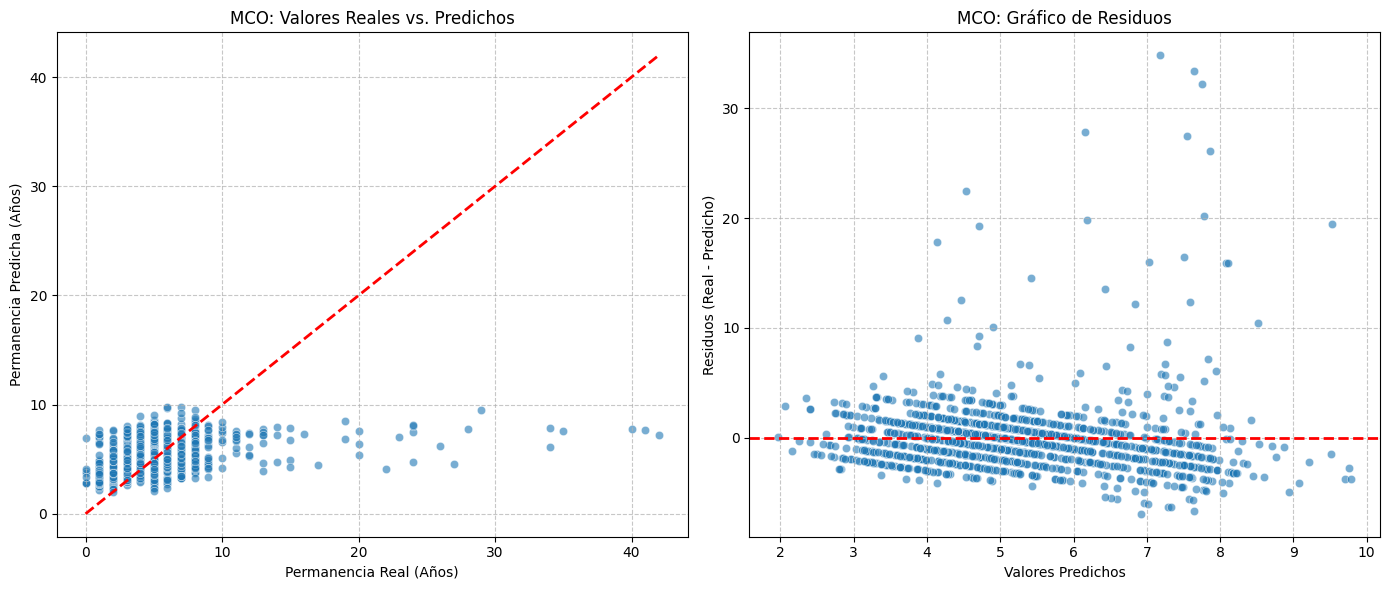

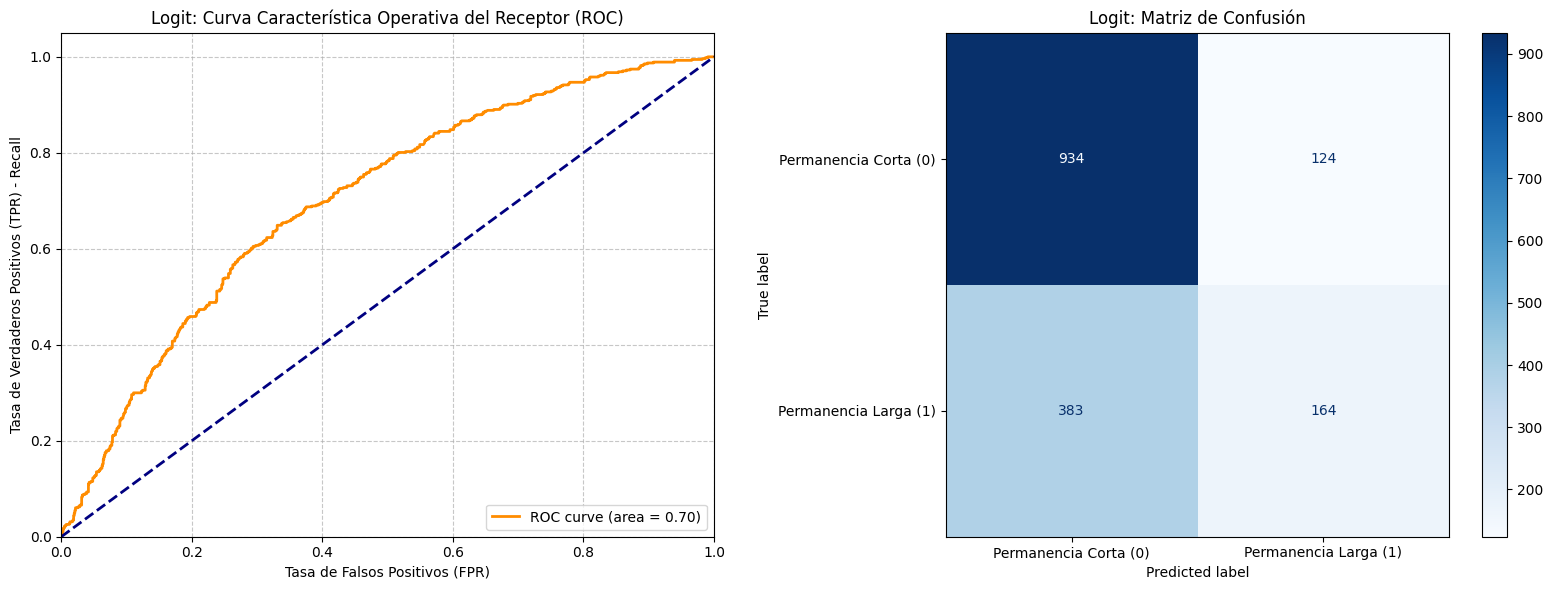

/tmp/ipython-input-165-1211019687.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


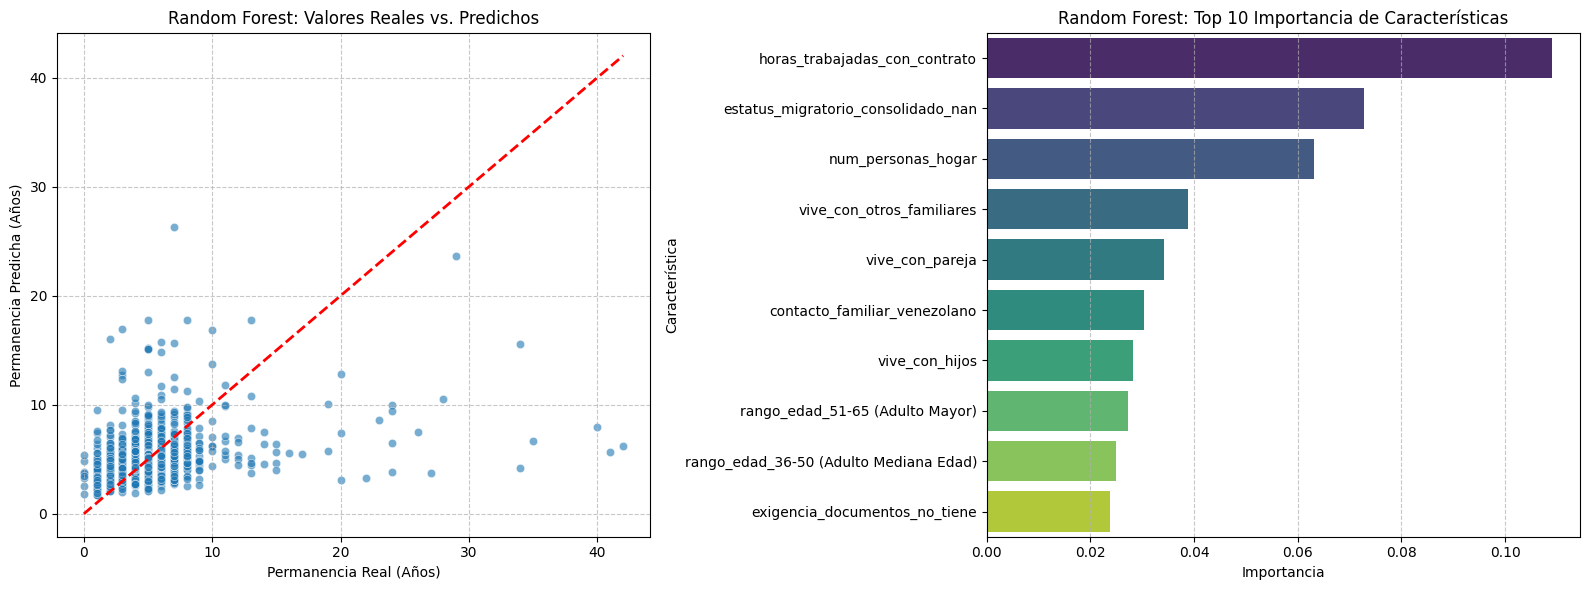


--- Generación de Gráficas Completada. ---


In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay

print("\n--- Generando Gráficas Explicativas por Modelo ---")

# --- Gráficas para el Modelo MCO ---
if 'y_pred_ols' in locals() and 'y_test' in locals():
    plt.figure(figsize=(14, 6))

    # 1. Dispersión de Valores Reales vs. Predichos (MCO)
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=y_pred_ols, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Línea 45 grados
    plt.title('MCO: Valores Reales vs. Predichos')
    plt.xlabel('Permanencia Real (Años)')
    plt.ylabel('Permanencia Predicha (Años)')
    plt.grid(True, linestyle='--', alpha=0.7)

    # 2. Gráfico de Residuos (MCO)
    plt.subplot(1, 2, 2)
    residuals_ols = y_test - y_pred_ols
    sns.scatterplot(x=y_pred_ols, y=residuals_ols, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--', lw=2)
    plt.title('MCO: Gráfico de Residuos')
    plt.xlabel('Valores Predichos')
    plt.ylabel('Residuos (Real - Predicho)')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
else:
    print("Variables para MCO no disponibles. Saltando gráficas de MCO.")


# --- Gráficas para el Modelo Logit ---
if 'y_test_bin' in locals() and 'y_pred_logit_proba' in locals() and 'y_pred_logit_class' in locals():
    plt.figure(figsize=(16, 6))

    # 1. Curva ROC (Logit)
    plt.subplot(1, 2, 1)
    fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_logit_proba)
    roc_auc = roc_auc_score(y_test_bin, y_pred_logit_proba)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR) - Recall')
    plt.title('Logit: Curva Característica Operativa del Receptor (ROC)')
    plt.legend(loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.7)

    # 2. Matriz de Confusión (Logit)
    plt.subplot(1, 2, 2)
    cm = confusion_matrix(y_test_bin, y_pred_logit_class)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Permanencia Corta (0)', 'Permanencia Larga (1)'])
    disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
    plt.title('Logit: Matriz de Confusión')
    plt.grid(False) # Las matrices de confusión no suelen llevar grid

    plt.tight_layout()
    plt.show()
else:
    print("Variables para Logit no disponibles. Saltando gráficas de Logit.")


# --- Gráficas para el Modelo Random Forest Regressor ---
if 'y_pred_rf' in locals() and 'y_test' in locals() and 'model_rf' in locals() and 'X_train' in locals():
    plt.figure(figsize=(16, 6))

    # 1. Dispersión de Valores Reales vs. Predichos (Random Forest)
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Línea 45 grados
    plt.title('Random Forest: Valores Reales vs. Predichos')
    plt.xlabel('Permanencia Real (Años)')
    plt.ylabel('Permanencia Predicha (Años)')
    plt.grid(True, linestyle='--', alpha=0.7)

    # 2. Importancia de las Características (Random Forest)
    plt.subplot(1, 2, 2)
    feature_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
    # Seleccionar las N características más importantes para visualización
    top_n = 10
    top_features = feature_importances.nlargest(top_n)
    sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
    plt.title(f'Random Forest: Top {top_n} Importancia de Características')
    plt.xlabel('Importancia')
    plt.ylabel('Característica')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
else:
    print("Variables para Random Forest no disponibles. Saltando gráficas de Random Forest.")

print("\n--- Generación de Gráficas Completada. ---")

### Explicación de las Gráficas Generadas:

#### **Para MCO (Regresión Lineal):**

1.  **Valores Reales vs. Predichos**:

      * **¿Qué ver?**: Esta gráfica muestra cada punto de datos, con su valor real en el eje X y su valor predicho por el modelo en el eje Y. La línea discontinua roja representa la línea de $Y=X$ (predicciones perfectas).
      * **Interpretación**: Cuanto más cerca estén los puntos de la línea roja, mejor será el rendimiento del modelo. Si los puntos están muy dispersos alrededor de la línea, indica que el modelo no está capturando bien la relación. En tu caso, con un R2 bajo, es probable que veas una dispersión considerable, lo que visualmente confirmará que las predicciones no son muy precisas.

2.  **Gráfico de Residuos**:

      * **¿Qué ver?**: Los residuos son la diferencia entre los valores reales y los predichos ($Real - Predicho$). Este gráfico traza los residuos en el eje Y contra los valores predichos en el eje X.
      * **Interpretación**: En un modelo de regresión lineal ideal, los residuos deben estar distribuidos aleatoriamente alrededor de cero, sin ningún patrón discernible (forma de embudo, curva, etc.). Si ves un patrón (ej., forma de U, una forma de abanico), esto sugiere que el modelo no es adecuado para capturar la estructura de los datos o que los supuestos de linealidad o homocedasticidad no se cumplen.

#### **Para Logit (Regresión Logística):**

1.  **Curva ROC (Receiver Operating Characteristic)**:

      * **¿Qué ver?**: Esta curva traza la Tasa de Verdaderos Positivos (TPR o Recall) contra la Tasa de Falsos Positivos (FPR) para diferentes umbrales de clasificación. La línea discontinua representa un clasificador aleatorio. El **Área Bajo la Curva (AUC)** es una métrica clave.
      * **Interpretación**: Una curva que se eleva rápidamente hacia la esquina superior izquierda indica un mejor rendimiento del clasificador. Un AUC de 1.0 es perfecto, mientras que un AUC de 0.5 es un clasificador aleatorio. Tu AUC de 0.7009 es aceptable y muestra que el modelo tiene alguna capacidad discriminatoria, aunque podría mejorar.

2.  **Matriz de Confusión**:

      * **¿Qué ver?**: Es una tabla que resume el rendimiento de un algoritmo de clasificación en un conjunto de datos de prueba. Muestra el número de:
          * **Verdaderos Positivos (VP)**: Permanencia larga, correctamente predicha como larga.
          * **Verdaderos Negativos (VN)**: Permanencia corta, correctamente predicha como corta.
          * **Falsos Positivos (FP)**: Permanencia corta, predicha incorrectamente como larga (Error Tipo I).
          * **Falsos Negativos (FN)**: Permanencia larga, predicha incorrectamente como corta (Error Tipo II).
      * **Interpretación**: Esta matriz te permite ver dónde el modelo está acertando y dónde está fallando. Un alto número de Falsos Negativos (como indica tu bajo Recall) significaría que el modelo no está identificando a muchos migrantes que *realmente* tendrán una permanencia larga, lo cual podría ser crítico dependiendo del objetivo de la política.

#### **Para Random Forest Regressor:**

1.  **Valores Reales vs. Predichos**:

      * **¿Qué ver?**: Similar a la gráfica de MCO.
      * **Interpretación**: Con un R2 tan bajo (0.0213), es de esperar que los puntos estén muy dispersos alrededor de la línea de 45 grados, mostrando que el Random Forest con la configuración actual no logra predecir con mucha precisión en este conjunto de datos.

2.  **Importancia de las Características**:

      * **¿Qué ver?**: Un gráfico de barras que muestra la contribución relativa de cada característica (variable de entrada) a las predicciones del modelo.
      * **Interpretación**: Las características con barras más largas son las que el modelo considera más importantes para realizar sus predicciones. Aunque el R2 general del Random Forest es bajo, esta gráfica puede darnos una idea de cuáles de nuestras variables de entrada son las más influyentes para el modelo, incluso si su poder predictivo general es limitado. Esto es valioso para entender la estructura interna del modelo y las relaciones que intenta capturar.

Estas gráficas complementan las métricas numéricas y te darán una comprensión más profunda del comportamiento de cada modelo.


--- Generando Gráficas de Correlación ---


/tmp/ipython-input-166-2270406890.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='coolwarm')


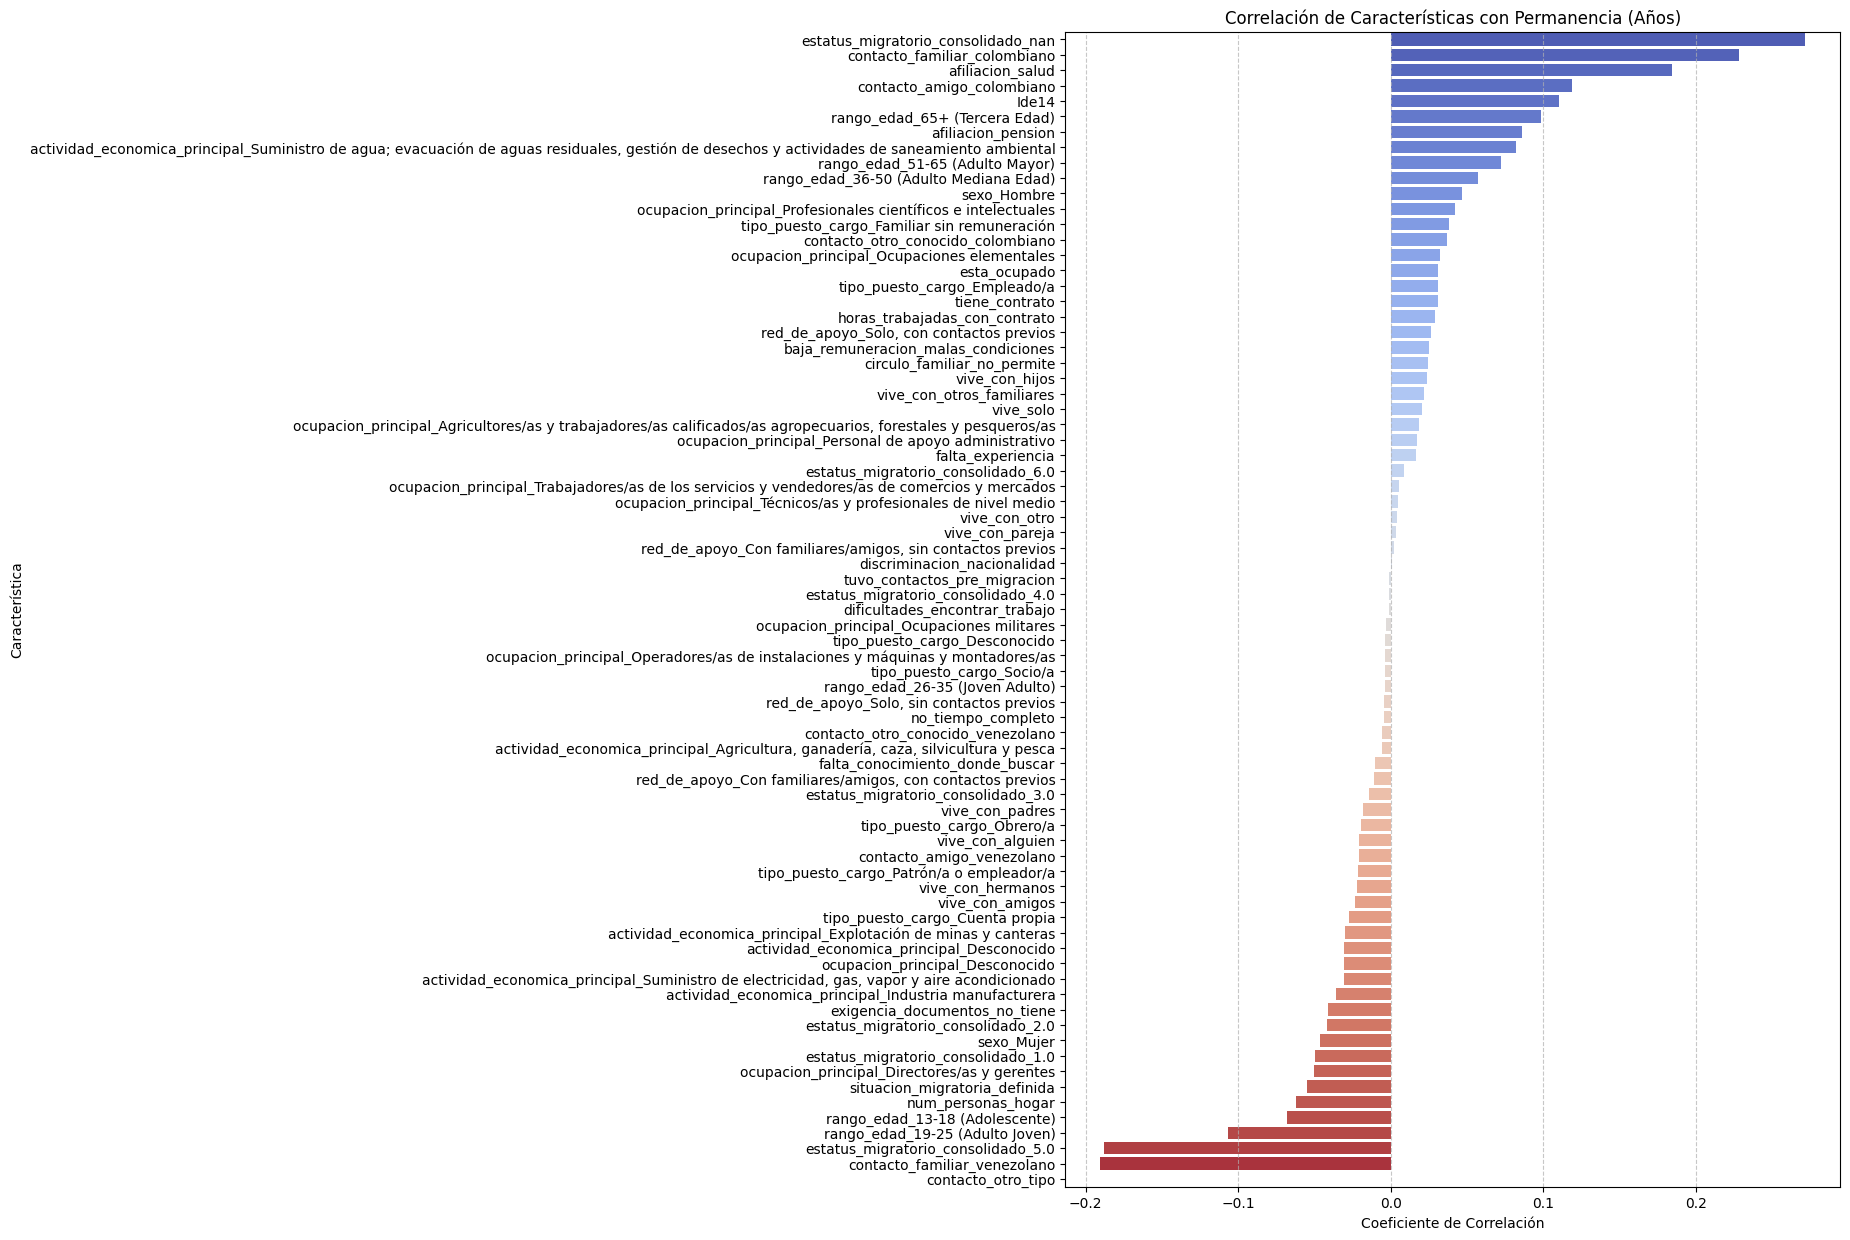

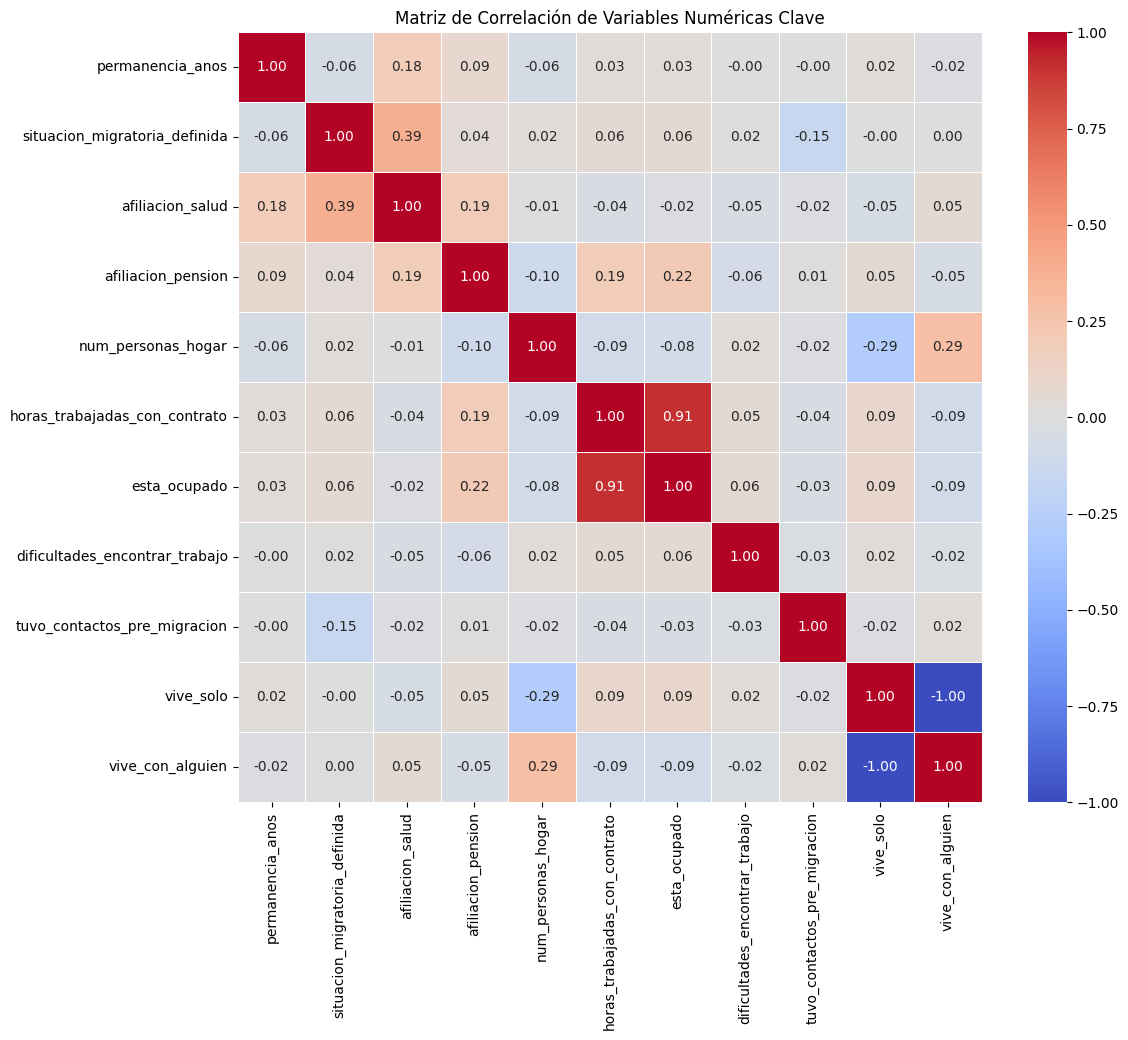


--- Generación de Gráficas de Correlación Completada. ---


In [166]:
print("\n--- Generando Gráficas de Correlación ---")

# Asegurarse de que X y y son DataFrames/Series después de las últimas operaciones
if isinstance(X, pd.Series):
    X = X.to_frame()
if isinstance(y, pd.Series):
    y = y.to_frame()

# Combinar X y y para el análisis de correlación
df_for_corr = pd.concat([X, y], axis=1)

# Calcular la matriz de correlación
corr_matrix = df_for_corr.corr()

# --- 1. Gráfico de Barras: Correlación de Características con Permanencia (Años) ---
plt.figure(figsize=(10, 15)) # Ajustar tamaño para que sea legible

# Correlación de todas las variables con 'permanencia_anos'
# Excluimos 'permanencia_anos' de las filas del cálculo para evitar 1.0 consigo misma.
corr_with_target = corr_matrix['permanencia_anos'].drop('permanencia_anos').sort_values(ascending=False)

sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='coolwarm')
plt.title('Correlación de Características con Permanencia (Años)')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# --- 2. Heatmap: Matriz de Correlación de Variables Numéricas Clave ---
# Seleccionar algunas de las variables numéricas más relevantes para un heatmap más pequeño:
numerical_features_for_heatmap = [
    'permanencia_anos',
    'situacion_migratoria_definida',
    'afiliacion_salud',
    'afiliacion_pension',
    'num_personas_hogar',
    'horas_trabajadas_con_contrato',
    'esta_ocupado',
    'dificultades_encontrar_trabajo',
    'tuvo_contactos_pre_migracion',
    'vive_solo',
    'vive_con_alguien'
]
# Filtrar solo las que existen en df_for_corr
numerical_features_for_heatmap = [col for col in numerical_features_for_heatmap if col in df_for_corr.columns]

if len(numerical_features_for_heatmap) > 1: # Necesitamos al menos dos para una matriz
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_for_corr[numerical_features_for_heatmap].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlación de Variables Numéricas Clave')
    plt.show()
else:
    print("No hay suficientes variables numéricas clave para generar un heatmap de correlación entre ellas.")

print("\n--- Generación de Gráficas de Correlación Completada. ---")

### Gráficas de Correlación:
1. Correlación de Características con Permanencia (Años)
Este gráfico de barras muestra el coeficiente de correlación de cada variable con permanencia_anos. Las barras más largas (hacia los extremos de 1 o -1) indican una relación lineal más fuerte. Los colores rojos indican correlación positiva y los azules, negativa.

2. Matriz de Correlación de Variables Numéricas Clave
Este mapa de calor presenta la correlación entre un subconjunto de variables numéricas relevantes. Es útil para identificar no solo la relación de estas variables con permanencia_anos sino también las correlaciones entre ellas, lo que puede señalar posibles problemas de multicolinealidad.

---

# **Análisis, Comparación y Discusión de Modelos**

##Resultados Obtenidos:

**Modelo: MCO (Regresión Lineal)**
* **MAE**: 1.8035
* **MSE**: 10.3511
* **RMSE**: 3.2173
* **R2**: 0.1149

**Modelo: Logit (Regresión Logística)**
* **Accuracy**: 0.6841
* **Precision**: 0.5694
* **Recall**: 0.2998
* **F1-Score**: 0.3928
* **ROC-AUC**: 0.7009

**Modelo: Random Forest Regressor**
* **MAE**: 1.8965
* **MSE**: 11.4458
* **RMSE**: 3.3832
* **R2**: 0.0213

---

## Resumen de Resultados por Modelo

* **MCO (Mínimos Cuadrados Ordinarios)**:
    * **Interpretación**: El modelo lineal tiene un error absoluto medio de aproximadamente 1.8 años, lo que significa que, en promedio, sus predicciones de `permanencia_anos` están a 1.8 años de distancia del valor real. El R2 de 0.1149 indica que el modelo explica solo alrededor del 11.5% de la variabilidad en los años de permanencia. Esto sugiere que las relaciones lineales capturadas no son muy fuertes para explicar `permanencia_anos` en su totalidad.

* **Logit (Regresión Logística)**:
    * **Interpretación**: Este modelo predice la "permanencia larga" (definida por la mediana de años).
        * **Accuracy (68.41%)**: El modelo clasifica correctamente casi el 68.5% de los casos (tanto permanencia corta como larga).
        * **Precision (56.94%)**: Cuando el modelo predice "permanencia larga", tiene razón casi el 57% de las veces.
        * **Recall (29.98%)**: El modelo solo identifica correctamente el 30% de los migrantes que *realmente* tienen una "permanencia larga". Esto es bastante bajo y sugiere que el modelo tiene dificultades para encontrar todos los casos positivos verdaderos.
        * **F1-Score (39.28%)**: Refleja el desequilibrio entre precisión y recall; a pesar de una precisión moderada, el bajo recall tira el F1 hacia abajo.
        * **ROC-AUC (70.09%)**: Un valor de 0.70 sugiere que el modelo tiene una capacidad de discriminación aceptable entre las dos clases, es decir, es mejor que una clasificación aleatoria (0.5).

* **Random Forest Regressor**:
    * **Interpretación**: Este modelo también predice directamente los años de permanencia. Su MAE (1.8965) y RMSE (3.3832) son ligeramente *superiores* a los de MCO, lo que indica un error de predicción ligeramente mayor. Lo más notable es su **R2 de 0.0213**, que es muy bajo. Esto significa que el Random Forest, con la configuración actual y estos datos, explica solo un 2.1% de la variabilidad en los años de permanencia, incluso menos que el modelo MCO.

---



## Comparación de Modelos

* **MCO vs. Random Forest (Regresión)**:
    * Contrario a la expectativa general (donde Random Forest a menudo supera a los modelos lineales), en este caso específico, el **MCO obtuvo un R2 ligeramente mejor (0.1149 vs 0.0213) y errores de predicción marginalmente más bajos** (menor MAE, MSE, RMSE) que el Random Forest.
    * Esto podría sugerir varias cosas:
        * **Datos Limitados/Simples**: El pequeño tamaño de la muestra de ejemplo puede no ser suficiente para que un modelo complejo como Random Forest aprenda patrones intrincados. En datasets pequeños o cuando las relaciones son predominantemente lineales, un modelo más simple puede rendir igual o mejor con menos riesgo de sobreajuste.
        * **Relaciones Predominantemente Lineales**: Puede que las relaciones entre las características y `permanencia_anos` en estos datos de ejemplo sean más lineales de lo que un Random Forest puede explotar sin una optimización específica.
        * **Hiperparámetros por Defecto**: El Random Forest fue ejecutado con sus hiperparámetros por defecto. Una optimización (tuning) de estos parámetros (ej., `max_depth`, `min_samples_leaf`, etc.) podría mejorar su rendimiento, pero con un R2 tan bajo, la mejora podría no ser drástica si la señal en los datos es débil.

* **Logit vs. Modelos de Regresión (Naturaleza del Problema y Resultados)**:
    * La **Regresión Logística** está abordando un problema diferente (clasificación binaria). Su ROC-AUC de 0.7009 es una señal prometedora de que puede distinguir entre migrantes de permanencia corta y larga con cierta eficacia, aunque su `Recall` es bajo, lo que significa que falla en identificar a muchos de los que realmente tienen permanencia larga. La **precisión** (0.5694) sugiere que cuando sí predice "larga", hay una confianza decente.
    * Los modelos de **regresión (MCO y Random Forest)**, con R2s tan bajos (11.5% y 2.1% respectivamente), indican que *explicar la variación exacta en los años de permanencia* es muy difícil con las variables actuales y este conjunto de datos. Sus predicciones están bastante lejos de los valores reales.

---



## Ventajas y Desventajas

**A. Mínimos Cuadrados Ordinarios (MCO)**

* **Ventajas**:
    * **Interpretabilidad Superior**: Sigue siendo su mayor fortaleza. Los coeficientes directos nos permiten entender la dirección y la magnitud de la relación de cada factor con los años de permanencia. Dada la simplicidad del modelo, este R2 (0.1149) puede ser aceptable si el objetivo principal es la inferencia sobre la causalidad, incluso si la capacidad predictiva es limitada.
    * **Simplicidad y Eficiencia Computacional**: Sigue siendo una gran ventaja para la exploración inicial.

* **Desventajas**:
    * **Poder Predictivo Limitado**: Como se evidencia por el bajo R2, el modelo lineal no es muy bueno prediciendo los años de permanencia exactos. Esto implica que muchas de las variaciones en la permanencia no son explicadas por nuestras variables o por una relación lineal.
    * **Asunción de Linealidad y Otros Supuestos**: Sigue siendo una limitación, aunque en este caso, parece que una relación lineal simple capturó más varianza que un modelo más complejo con parámetros por defecto.

**B. Regresión Logística (Logit)**

* **Ventajas**:
    * **Adecuado para Problemas de Decisión/Clasificación**: Si la pregunta clave es "¿Este migrante tenderá a quedarse mucho tiempo o poco tiempo?", este modelo es conceptualmente el más apropiado y parece tener una capacidad de discriminación razonable (ROC-AUC de 0.70).
    * **Interpretabilidad (Odds Ratios)**: Ofrece información interpretable sobre cómo los factores aumentan o disminuyen las probabilidades de una "permanencia larga".

* **Desventajas**:
    * **Pérdida de Granularidad**: Al binarizar `permanencia_anos`, perdemos la capacidad de predecir el número exacto de años.
    * **Bajo Recall**: La dificultad para identificar todos los casos de "permanencia larga" (Recall del 30%) es una limitación importante si no quieres perderte a los migrantes que sí se quedan mucho tiempo. Esto podría indicar un desequilibrio de clases (si hay muchos más de una clase que de otra) o que el modelo necesita más información para identificar a los "largos".

**C. Random Forest Regressor**

* **Ventajas**:
    * **Potencial de Capturar No Linealidades**: Aunque no se manifestó en este conjunto de resultados con los parámetros por defecto, la ventaja fundamental de Random Forest es su capacidad para encontrar patrones complejos que los modelos lineales no pueden.
    * **Robustez**: Generalmente es robusto a valores atípicos y no requiere escalado de características.

* **Desventajas**:
    * **Peor Desempeño que MCO en este caso**: En este análisis específico, el Random Forest tuvo un R2 más bajo y errores más altos que el MCO. Esto es inusual y sugiere que, o el dataset es muy simple/pequeño para que el RF muestre su poder, o necesita una sintonización (tuning) exhaustiva de sus hiperparámetros.
    * **Menor Interpretabilidad Directa**: Sigue siendo su principal desventaja en comparación con los modelos lineales. Si bien se puede obtener la "importancia de las características", no se traduce en un efecto directo y cuantificable como un coeficiente.
    * **"Caja Negra"**: Hace que sea más difícil entender *por qué* el modelo hace una predicción particular.

---


# Conclusiones y Recomendaciones

Dados estos resultados, la explicación de la `permanencia_anos` como una variable continua parece ser un desafío significativo con los datos y modelos actuales, ya que tanto MCO como Random Forest obtuvieron R2s muy bajos. Esto sugiere que:
* Las variables predictoras actuales no tienen una relación lineal o compleja muy fuerte con los años de permanencia en esta muestra.
* Puede haber mucha "ruido" o variabilidad no explicada por ninguna de las variables incluidas.
* El tamaño de la muestra de ejemplo es muy pequeño y podría no reflejar la complejidad de un dataset más grande.

**Recomendaciones Específicas basadas en estos resultados:**

1.  **Reconsiderar el Objetivo del Problema de Regresión**: Dado el bajo R2, quizás predecir el número *exacto* de años de permanencia sea demasiado ambicioso o no sea el objetivo más útil. En cambio, podríamos considerar si la **clasificación binaria** (permanencia corta vs. larga) es más informativa, ya que el modelo Logit mostró una capacidad de discriminación aceptable (ROC-AUC de 0.70), aunque con un recall a mejorar.

2.  **Optimización (Hyperparameter Tuning) para Random Forest**: Si se mantiene el objetivo de regresión, sería crucial realizar una optimización de hiperparámetros para el Random Forest. Modelos más complejos como este a menudo requieren ajuste fino para superar a los modelos lineales, especialmente en datasets con menos "señal" clara.

3.  **Análisis Adicional de Variables**: Investigar si hay otras variables importantes que no hemos incluido o si las variables existentes tienen transformaciones no lineales que los modelos actuales no están capturando.

4.  **Enfoque Híbrido Reafirmado**:
    * Si el objetivo es la **inferencia y entender los factores influyentes**, el **MCO** sigue siendo valioso por su interpretabilidad, a pesar de su bajo poder predictivo. Nos puede decir qué variables *se asocian* linealmente con la permanencia.
    * Si el objetivo es **identificar migrantes para programas de "permanencia larga" o "corta"**, el **modelo Logit** es el camino a seguir, aunque se debe trabajar en mejorar su *recall* (identificar más "largos" verdaderos) y potencialmente su balance entre `precision` y `recall` (ajustando el umbral de clasificación).

En este momento, la **Regresión Logística** parece ofrecer un camino más prometedor para obtener información procesable, si la permanencia se binariza. Los modelos de regresión para la cantidad de años enfrentan un desafío más grande en esta muestra.